In [1]:
import sqlite3
import pprint
import json
import numpy as np # imports a fast numerical programming library
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
#pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
#pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options
color = sns.color_palette()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
%matplotlib inline

Using TensorFlow backend.


In [2]:
!python --version
!pip list

Python 3.6.6
Package              Version
-------------------- -------
absl-py              0.7.1  
astor                0.7.1  
attrs                19.1.0 
backcall             0.1.0  
bleach               3.1.0  
cycler               0.10.0 
decorator            4.4.0  
defusedxml           0.6.0  
entrypoints          0.3    
gast                 0.2.2  
grpcio               1.20.1 
h5py                 2.9.0  
ipykernel            5.1.0  
ipython              7.5.0  
ipython-genutils     0.2.0  
ipywidgets           7.4.2  
jedi                 0.13.3 
Jinja2               2.10.1 
jsonschema           3.0.1  
jupyter              1.0.0  
jupyter-client       5.2.4  
jupyter-console      6.0.0  
jupyter-core         4.4.0  
Keras                2.2.4  
Keras-Applications   1.0.7  
Keras-Preprocessing  1.0.9  
kiwisolver           1.1.0  
Markdown             3.1    
MarkupSafe           1.1.1  
matplotlib           3.0.3  
mistune              0.8.4  
mock                 3.0.3  
n

In [3]:
!ls

data.json		     dschallenge_kmeans.ipynb  test_data.db
Data Science Career Path.md  LICENSE		       test_data.db.zip
dschallenge_keras.ipynb      README.md		       test_data.zip


In [4]:
conn = sqlite3.connect("test_data.db")
cur = conn.cursor()

In [5]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
cur.execute("SELECT name FROM sqlite_master WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1")
results = cur.fetchall()
pp.pprint(results)

[('customers',)]


In [7]:
cur.execute("PRAGMA TABLE_INFO(customers)")
results = cur.fetchall()
pp.pprint(results)

[   (0, 'customer_id', 'varchar(32)', 0, None, 0),
    (1, 'days_since_first_order', 'int', 0, None, 0),
    (2, 'days_since_last_order', 'int', 0, None, 0),
    (3, 'is_newsletter_subscriber', 'varchar(1)', 0, None, 0),
    (4, 'orders', 'int', 0, None, 0),
    (5, 'items', 'int', 0, None, 0),
    (6, 'cancels', 'int', 0, None, 0),
    (7, 'returns', 'int', 0, None, 0),
    (8, 'different_addresses', 'int', 0, None, 0),
    (9, 'shipping_addresses', 'int', 0, None, 0),
    (10, 'devices', 'int', 0, None, 0),
    (11, 'vouchers', 'int', 0, None, 0),
    (12, 'cc_payments', 'int', 0, None, 0),
    (13, 'paypal_payments', 'int', 0, None, 0),
    (14, 'afterpay_payments', 'int', 0, None, 0),
    (15, 'apple_payments', 'int', 0, None, 0),
    (16, 'female_items', 'int', 0, None, 0),
    (17, 'male_items', 'int', 0, None, 0),
    (18, 'unisex_items', 'int', 0, None, 0),
    (19, 'wapp_items', 'int', 0, None, 0),
    (20, 'wftw_items', 'int', 0, None, 0),
    (21, 'mapp_items', 'int', 0, Non

In [8]:
# Stage 1
#1. What was the total revenue to the nearest dollar for customers who have paid by credit card?
#2. What percentage of customers who have purchased female items have paid by credit card?
#3. What was the average revenue for customers who used either iOS, Android or Desktop?
#4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?


## Stage 1: SQL
### 1. What was the total revenue to the nearest dollar for customers who have paid by credit card?

In [9]:
cur.execute("SELECT DISTINCT cc_payments FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(1,), (0,)]


In [10]:
cur.execute("SELECT DISTINCT revenue FROM customers")
results = cur.fetchall()
pp.pprint(results)

[   (6946.34,),
    (5329.28,),
    (14133.87,),
    (143.64,),
    (0.0,),
    (63.59,),
    (40.86,),
    (186.32,),
    (774.03,),
    (16236.2,),
    (1710.67,),
    (5564.85,),
    (45.41,),
    (3393.47,),
    (4407.39,),
    (668.25,),
    (117.27,),
    (11424.83,),
    (3201.83,),
    (954.97,),
    (563.41,),
    (226.36,),
    (16590.07,),
    (15894.32,),
    (126.36,),
    (119.58,),
    (71.82,),
    (43.59,),
    (1976.13,),
    (198.94,),
    (1362.7,),
    (685.84,),
    (172.61,),
    (153.64,),
    (49.95,),
    (26.32,),
    (619.42,),
    (199.09,),
    (149.75,),
    (20.86,),
    (45.44,),
    (19.8,),
    (2421.98,),
    (3019.37,),
    (113.64,),
    (145.26,),
    (72.68,),
    (2916.68,),
    (114.9,),
    (15.84,),
    (1647.9,),
    (409.1,),
    (273.39,),
    (1178.76,),
    (2252.47,),
    (872.97,),
    (371.71,),
    (246.86,),
    (689.45,),
    (400.8,),
    (272.64,),
    (189.59,),
    (71.6,),
    (1126.88,),
    (66.63,),
    (365.78,),
    (1247

    (19810.75,),
    (2278.94,),
    (2821.81,),
    (452.06,),
    (244.36,),
    (3996.29,),
    (4132.79,),
    (13926.4,),
    (32598.53,),
    (106.77,),
    (795.76,),
    (7872.14,),
    (396.36,),
    (1081.77,),
    (181.72,),
    (94.36,),
    (3491.36,),
    (1592.01,),
    (412.43,),
    (218.98,),
    (2476.88,),
    (4121.57,),
    (765.42,),
    (1352.31,),
    (64.55,),
    (1057.31,),
    (160.95,),
    (54.03,),
    (2565.07,),
    (90.82,),
    (885.93,),
    (876.89,),
    (139.95,),
    (200.0,),
    (164.5,),
    (510.79,),
    (6881.38,),
    (5.7,),
    (314.14,),
    (267.08,),
    (3590.76,),
    (538.63,),
    (156.13,),
    (126.32,),
    (90.91,),
    (1265.83,),
    (792.15,),
    (2259.27,),
    (990.52,),
    (489.91,),
    (1333.18,),
    (298.04,),
    (390.11,),
    (63.63,),
    (797.69,),
    (9147.51,),
    (1924.39,),
    (948.94,),
    (82793.97,),
    (8035.84,),
    (75.0,),
    (106.27,),
    (596.75,),
    (7759.36,),
    (227.23,),
    (1261

    (1090.39,),
    (1043.47,),
    (5310.56,),
    (756.38,),
    (4988.65,),
    (1815.79,),
    (4121.65,),
    (183885.79,),
    (1580.52,),
    (499.9,),
    (4292.72,),
    (109.1,),
    (89.06,),
    (5069.06,),
    (649.5,),
    (1328.02,),
    (240.8,),
    (70.88,),
    (9678.02,),
    (3608.05,),
    (198039.14,),
    (509.62,),
    (272.31,),
    (2437.17,),
    (19.08,),
    (290.5,),
    (640.58,),
    (106.78,),
    (32.72,),
    (195.57,),
    (6340.4,),
    (137.06,),
    (2171.87,),
    (979.87,),
    (92.6,),
    (1117.78,),
    (4290.87,),
    (620.73,),
    (1194.17,),
    (359.35,),
    (2380.71,),
    (702.72,),
    (196.36,),
    (5611.19,),
    (129.35,),
    (926.54,),
    (286.19,),
    (699.45,),
    (2526.79,),
    (221.48,),
    (353.59,),
    (440.67,),
    (70.85,),
    (338.04,),
    (2598.54,),
    (21279.95,),
    (24942.38,),
    (24.54,),
    (187.14,),
    (55.15,),
    (5156.86,),
    (399.9,),
    (522.72,),
    (77701.93,),
    (108.98,),
    (6

    (87.52,),
    (78.01,),
    (1056.0,),
    (444.25,),
    (10324.92,),
    (296.94,),
    (961.35,),
    (2297.03,),
    (719.74,),
    (181.56,),
    (8680.93,),
    (2209.49,),
    (657.79,),
    (3062.21,),
    (151.15,),
    (126.29,),
    (114.52,),
    (806.38,),
    (218.04,),
    (20137.77,),
    (279.91,),
    (3000.42,),
    (48.27,),
    (30.84,),
    (673.7,),
    (206.22,),
    (575.02,),
    (807.43,),
    (3056.52,),
    (1750.5,),
    (2468.65,),
    (145.12,),
    (297.51,),
    (59.97,),
    (191.68,),
    (366.88,),
    (76.77,),
    (67.18,),
    (32.45,),
    (145.44,),
    (59.93,),
    (4141.77,),
    (54.0,),
    (307.28,),
    (417.8,),
    (341.59,),
    (401.8,),
    (4117.52,),
    (168.09,),
    (3302.09,),
    (68.7,),
    (517.89,),
    (9025.26,),
    (2923.76,),
    (2978.28,),
    (149.85,),
    (2979.17,),
    (2665.47,),
    (509.55,),
    (1621.35,),
    (57.45,),
    (86.36,),
    (250.05,),
    (509.0,),
    (317.09,),
    (315.26,),
    (345.

    (808.23,),
    (510.77,),
    (67088.33,),
    (76.34,),
    (82.09,),
    (344.48,),
    (794.03,),
    (3510.84,),
    (7.27,),
    (3933.22,),
    (2105.39,),
    (5094.94,),
    (258.63,),
    (1254.3,),
    (827.47,),
    (218.13,),
    (1425.15,),
    (139.01,),
    (183.38,),
    (284.29,),
    (304.02,),
    (89.05,),
    (1174.05,),
    (276.28,),
    (1184.4,),
    (61.91,),
    (199.62,),
    (1429.64,),
    (588.68,),
    (2615.36,),
    (1466.03,),
    (2262.21,),
    (8932.27,),
    (418.06,),
    (887.89,),
    (306.05,),
    (2952.42,),
    (905.95,),
    (372.64,),
    (63.58,),
    (1891.49,),
    (1244.86,),
    (4231.8,),
    (2454.86,),
    (393.27,),
    (5465.17,),
    (1180.61,),
    (77.21,),
    (400.79,),
    (7684.33,),
    (138.1,),
    (1168.95,),
    (397.37,),
    (837.77,),
    (48.7,),
    (429.68,),
    (1883.52,),
    (7641.95,),
    (132.63,),
    (14378.77,),
    (7919.63,),
    (320.83,),
    (45.4,),
    (849.94,),
    (240.7,),
    (3694.95,

    (302.08,),
    (3002.1,),
    (7341.87,),
    (436.82,),
    (145.38,),
    (1427.93,),
    (567.72,),
    (5885.2,),
    (567.96,),
    (59.99,),
    (118.94,),
    (3063.95,),
    (321.39,),
    (465.87,),
    (4412.78,),
    (576.35,),
    (36.0,),
    (288.01,),
    (10.91,),
    (194.44,),
    (278.92,),
    (863.73,),
    (337.1,),
    (11092.65,),
    (838.87,),
    (1265.75,),
    (4439.4,),
    (1694.88,),
    (12.27,),
    (365.36,),
    (385.65,),
    (87.08,),
    (404.82,),
    (541.23,),
    (908.94,),
    (847.2,),
    (855.09,),
    (3948.54,),
    (5333.17,),
    (167.12,),
    (116543.17,),
    (1112.4,),
    (6151.3,),
    (374.98,),
    (289.72,),
    (644.19,),
    (7092.14,),
    (105.34,),
    (422.54,),
    (479.92,),
    (10084.71,),
    (645.88,),
    (140.84,),
    (863.21,),
    (614.79,),
    (2799.3,),
    (881.58,),
    (286.28,),
    (194.77,),
    (98.04,),
    (134.48,),
    (433.59,),
    (1021.8,),
    (6486.31,),
    (6789.9,),
    (639.63,),
  

    (2175.58,),
    (7865.42,),
    (937.68,),
    (17.25,),
    (823.05,),
    (29823.7,),
    (963.01,),
    (90.88,),
    (163.51,),
    (610.77,),
    (559.08,),
    (352.52,),
    (92.53,),
    (3947.56,),
    (99.55,),
    (26175.92,),
    (11513.01,),
    (431.14,),
    (225.37,),
    (852.53,),
    (293.62,),
    (145.33,),
    (242.55,),
    (225.27,),
    (7693.92,),
    (2454.05,),
    (378.0,),
    (278.33,),
    (513.98,),
    (993.52,),
    (7704.8,),
    (2018.37,),
    (620.51,),
    (242.63,),
    (28.36,),
    (210.8,),
    (28.96,),
    (695.46,),
    (1248.36,),
    (880.71,),
    (1194.21,),
    (13633.92,),
    (675.47,),
    (30.93,),
    (2015.09,),
    (1086.54,),
    (689.71,),
    (494.41,),
    (77.19,),
    (519.86,),
    (747.18,),
    (14.51,),
    (432.51,),
    (622.34,),
    (401.56,),
    (1274.5,),
    (1112.86,),
    (1429.61,),
    (538.68,),
    (7664.53,),
    (7495.3,),
    (505.23,),
    (504.45,),
    (397.04,),
    (1796.16,),
    (89.5,),
  

    (3031.39,),
    (515.07,),
    (647.12,),
    (668.56,),
    (1300.97,),
    (168.01,),
    (413.77,),
    (1205.74,),
    (195.41,),
    (2045.8,),
    (120.76,),
    (1796.85,),
    (267.18,),
    (1202.03,),
    (1944.92,),
    (105.36,),
    (408.63,),
    (1558.78,),
    (92.18,),
    (619.85,),
    (2579.04,),
    (3443.44,),
    (194.45,),
    (758.87,),
    (463.88,),
    (298.08,),
    (1912.39,),
    (3739.65,),
    (389.52,),
    (2791.87,),
    (145.73,),
    (999.53,),
    (848.61,),
    (372.43,),
    (1396.23,),
    (3098.06,),
    (170.77,),
    (240.64,),
    (1070.37,),
    (427.89,),
    (153.42,),
    (2362.71,),
    (1603.3,),
    (190.65,),
    (267.2,),
    (616.05,),
    (63.55,),
    (4980.03,),
    (10812.66,),
    (261.66,),
    (504.36,),
    (390.36,),
    (445.99,),
    (255.61,),
    (294.17,),
    (181.09,),
    (107.24,),
    (1675.24,),
    (2734.43,),
    (89.86,),
    (8456.16,),
    (413.3,),
    (747.66,),
    (47.27,),
    (144.99,),
    (3044

    (382.4,),
    (1551.17,),
    (330.72,),
    (1002.05,),
    (302.88,),
    (253.18,),
    (189.32,),
    (285.6,),
    (400.82,),
    (536.05,),
    (102.59,),
    (462.47,),
    (136.28,),
    (1572.54,),
    (127.13,),
    (610.59,),
    (1934.78,),
    (170.76,),
    (143.36,),
    (309.02,),
    (5667.12,),
    (263.64,),
    (305.37,),
    (188.3,),
    (4090.76,),
    (70.89,),
    (1639.75,),
    (328.52,),
    (1028.63,),
    (39.05,),
    (6887.97,),
    (286.36,),
    (810.72,),
    (2644.06,),
    (1172.11,),
    (28.6,),
    (78.9,),
    (6666.35,),
    (1182.68,),
    (348.8,),
    (213.56,),
    (1597.08,),
    (310.77,),
    (1714.19,),
    (589.09,),
    (248.98,),
    (1972.94,),
    (139.9,),
    (776.55,),
    (1430.98,),
    (490.08,),
    (707.55,),
    (89.65,),
    (1039.28,),
    (1453.6,),
    (6883.78,),
    (506.52,),
    (297.0,),
    (3194.93,),
    (280.47,),
    (1753.15,),
    (926.0,),
    (225.36,),
    (187.05,),
    (311.19,),
    (1587.78,),
  

    (2933.21,),
    (281.4,),
    (734.85,),
    (768.04,),
    (665.75,),
    (474.04,),
    (143.2,),
    (543.58,),
    (245.04,),
    (1228.25,),
    (154.93,),
    (330.26,),
    (1979.06,),
    (362.2,),
    (3316.15,),
    (477.39,),
    (927.56,),
    (680.25,),
    (194.95,),
    (6867.01,),
    (10568.21,),
    (149.86,),
    (18.18,),
    (585.45,),
    (413.51,),
    (11084.11,),
    (638.96,),
    (3814.77,),
    (209.06,),
    (4049.95,),
    (450.56,),
    (4458.95,),
    (1098.6,),
    (168.51,),
    (253.19,),
    (2145.95,),
    (4983.03,),
    (331.51,),
    (267.76,),
    (255.39,),
    (1035.15,),
    (1010.73,),
    (72.58,),
    (436.34,),
    (1514.38,),
    (828.95,),
    (301.84,),
    (199.98,),
    (214.36,),
    (1873.66,),
    (1565.0,),
    (1371.42,),
    (9393.33,),
    (301.28,),
    (3204.91,),
    (108957.31,),
    (354.35,),
    (167.2,),
    (181.53,),
    (110.5,),
    (447.73,),
    (519.36,),
    (3302.82,),
    (4828.29,),
    (341.56,),
    (2

    (1086.31,),
    (275.07,),
    (325.48,),
    (625.93,),
    (665.81,),
    (969.15,),
    (249.22,),
    (1737.91,),
    (654.6,),
    (2318.01,),
    (640.9,),
    (212.08,),
    (4286.35,),
    (1713.11,),
    (474.01,),
    (661.51,),
    (238.41,),
    (888.4,),
    (113.55,),
    (682.69,),
    (286.14,),
    (538.4,),
    (14131.04,),
    (15406.6,),
    (5.68,),
    (343.08,),
    (2084.11,),
    (612.56,),
    (116.82,),
    (2569.47,),
    (3681.3,),
    (113.28,),
    (10581.2,),
    (29.53,),
    (2154.03,),
    (4426.61,),
    (283.54,),
    (1020.51,),
    (3339.41,),
    (94.95,),
    (170.67,),
    (768.46,),
    (113.6,),
    (166.32,),
    (2060.9,),
    (5980.31,),
    (3373.99,),
    (258.9,),
    (257.58,),
    (1784.42,),
    (468.99,),
    (37270.02,),
    (435.77,),
    (189.08,),
    (6871.83,),
    (260.19,),
    (68.1,),
    (2726.83,),
    (2918.77,),
    (2595.46,),
    (519.84,),
    (4621.17,),
    (108.17,),
    (334.23,),
    (419.81,),
    (83.56,)

    (595.1,),
    (283.73,),
    (86.28,),
    (645.95,),
    (876.94,),
    (1966.07,),
    (1299.93,),
    (67.19,),
    (768.62,),
    (121.74,),
    (129.84,),
    (125.33,),
    (646.32,),
    (81.49,),
    (415.57,),
    (126.66,),
    (3163.62,),
    (121.78,),
    (626.4,),
    (787.51,),
    (991.54,),
    (2391.13,),
    (269.75,),
    (143.54,),
    (507.77,),
    (1261.11,),
    (269.83,),
    (1170.38,),
    (841.21,),
    (610.44,),
    (817.76,),
    (957.72,),
    (266.7,),
    (75.73,),
    (463.67,),
    (1068.66,),
    (1126.65,),
    (626.74,),
    (799.76,),
    (326.11,),
    (136.67,),
    (757.2,),
    (2128.46,),
    (73.52,),
    (282.58,),
    (154.91,),
    (194.46,),
    (618.78,),
    (183.39,),
    (1340.52,),
    (207.06,),
    (465.68,),
    (1258.55,),
    (1122.6,),
    (711.82,),
    (1009.36,),
    (601.66,),
    (430.7,),
    (360.0,),
    (784.92,),
    (457.56,),
    (321.64,),
    (670.88,),
    (614.7,),
    (2064.16,),
    (234.45,),
    (2034

    (11063.92,),
    (105.04,),
    (447.27,),
    (597.62,),
    (336.01,),
    (1494.95,),
    (602.1,),
    (2810.88,),
    (2264.2,),
    (1466.32,),
    (1422.21,),
    (284.59,),
    (80.9,),
    (1577.79,),
    (222.6,),
    (15328.44,),
    (129.8,),
    (261.6,),
    (537.92,),
    (12773.7,),
    (314.91,),
    (1651.4,),
    (335.1,),
    (112.46,),
    (292.63,),
    (1472.49,),
    (216.59,),
    (714.15,),
    (87.8,),
    (320.25,),
    (102.66,),
    (130.86,),
    (2778.3,),
    (332.88,),
    (77.56,),
    (2773.46,),
    (1090.58,),
    (87.68,),
    (2369.42,),
    (39.88,),
    (482.63,),
    (92.78,),
    (458.67,),
    (1494.69,),
    (303.06,),
    (114.64,),
    (1432.48,),
    (820.63,),
    (251.35,),
    (4711.51,),
    (80.89,),
    (364.42,),
    (1141.35,),
    (328.12,),
    (4325.23,),
    (295.25,),
    (147.03,),
    (74.44,),
    (2161.4,),
    (5674.51,),
    (318.87,),
    (1985.64,),
    (211.5,),
    (324.37,),
    (85.43,),
    (281.58,),
    (2

    (1692.12,),
    (437.82,),
    (281.82,),
    (899.6,),
    (12086.11,),
    (131.92,),
    (104.88,),
    (495.05,),
    (169.82,),
    (1265.29,),
    (284.68,),
    (1362.37,),
    (143.24,),
    (3337.76,),
    (3051.56,),
    (243.9,),
    (1980.59,),
    (3634.54,),
    (1166.16,),
    (842.11,),
    (166.29,),
    (11.1,),
    (152.86,),
    (408.93,),
    (2414.79,),
    (130.0,),
    (336.85,),
    (351.16,),
    (252.28,),
    (1573.96,),
    (111.96,),
    (1027.78,),
    (19.63,),
    (1123.5,),
    (145.46,),
    (1577.78,),
    (630.38,),
    (548.52,),
    (311.22,),
    (572.37,),
    (297.26,),
    (4978.52,),
    (120.7,),
    (1179.4,),
    (3669.7,),
    (435.45,),
    (363.59,),
    (2163.08,),
    (813.87,),
    (395.43,),
    (298.86,),
    (3372.49,),
    (423.55,),
    (169.5,),
    (10011.39,),
    (195.42,),
    (1495.28,),
    (308.86,),
    (1644.59,),
    (16343.58,),
    (454.3,),
    (1921.8,),
    (481.28,),
    (1419.4,),
    (262.68,),
    (1148.5

    (467.47,),
    (2851.87,),
    (181.01,),
    (4976.62,),
    (1350.97,),
    (2745.19,),
    (315.59,),
    (982.74,),
    (212.43,),
    (344.56,),
    (13576.56,),
    (648.15,),
    (336.36,),
    (2810.99,),
    (693.46,),
    (3167.92,),
    (245.42,),
    (352.86,),
    (44.48,),
    (549.5,),
    (232.73,),
    (899.73,),
    (1384.21,),
    (2872.46,),
    (209.1,),
    (47.9,),
    (3229.68,),
    (134.09,),
    (2480.75,),
    (345.82,),
    (104.95,),
    (187.32,),
    (308.0,),
    (683.44,),
    (11386.1,),
    (56.99,),
    (1326.86,),
    (850.58,),
    (843.3,),
    (86.5,),
    (260.0,),
    (287.06,),
    (331.85,),
    (1743.46,),
    (1137.78,),
    (2448.67,),
    (1236.11,),
    (327.54,),
    (12375.56,),
    (26477.52,),
    (419.75,),
    (290.02,),
    (83847.8,),
    (529.08,),
    (1199.24,),
    (89.03,),
    (617.87,),
    (14268.39,),
    (299.75,),
    (439.77,),
    (1633.02,),
    (673.43,),
    (91.5,),
    (523.29,),
    (184.12,),
    (21535.2

    (158.07,),
    (795.8,),
    (255.68,),
    (298.18,),
    (1747.58,),
    (668.01,),
    (272.46,),
    (688.61,),
    (534.28,),
    (1347.64,),
    (287.68,),
    (767.56,),
    (6658.21,),
    (377.27,),
    (1033.39,),
    (841.56,),
    (2525.89,),
    (264.89,),
    (434.7,),
    (269.95,),
    (698.63,),
    (614.84,),
    (1098.97,),
    (61.36,),
    (4663.75,),
    (975.97,),
    (911.84,),
    (132.88,),
    (153.63,),
    (763.2,),
    (739.73,),
    (18874.2,),
    (5.36,),
    (4839.46,),
    (625.07,),
    (284.96,),
    (786.0,),
    (343.05,),
    (631.92,),
    (3619.53,),
    (1017.28,),
    (330.7,),
    (1050.81,),
    (338.05,),
    (266.48,),
    (249.33,),
    (1962.6,),
    (2542.31,),
    (2391.41,),
    (271.84,),
    (7842.59,),
    (981.45,),
    (372.68,),
    (6113.83,),
    (187.95,),
    (1316.01,),
    (868.77,),
    (3503.14,),
    (3104.42,),
    (1175.59,),
    (294.4,),
    (215.42,),
    (2534.6,),
    (7718.71,),
    (1453.68,),
    (758.52,

    (558.32,),
    (2939.96,),
    (6813.33,),
    (69335.87,),
    (1952.52,),
    (219.82,),
    (2140.23,),
    (258.69,),
    (518.88,),
    (304.35,),
    (337.8,),
    (543.54,),
    (613.1,),
    (165.36,),
    (3337.2,),
    (1989.68,),
    (996.78,),
    (4214.97,),
    (454.27,),
    (854.94,),
    (1589.61,),
    (3432.0,),
    (850.35,),
    (498.14,),
    (415.97,),
    (893.88,),
    (1930.13,),
    (1444.9,),
    (739.71,),
    (411.97,),
    (579.54,),
    (613.29,),
    (152.46,),
    (1097.13,),
    (124.83,),
    (5793.62,),
    (421.81,),
    (1602.76,),
    (1011.44,),
    (357.11,),
    (8101.61,),
    (20776.97,),
    (483.37,),
    (23.86,),
    (542.18,),
    (214.9,),
    (1512.45,),
    (272.72,),
    (600.04,),
    (32605.13,),
    (1768.16,),
    (2132.39,),
    (211.81,),
    (5859.7,),
    (306.45,),
    (3733.25,),
    (985.86,),
    (225.84,),
    (265.68,),
    (797.29,),
    (1322.81,),
    (739.4,),
    (663.45,),
    (5648.76,),
    (933.01,),
    (

    (781.56,),
    (917.26,),
    (1188.92,),
    (445.94,),
    (230.0,),
    (124.49,),
    (2548.07,),
    (654.44,),
    (2983.81,),
    (236.35,),
    (224.95,),
    (1420.6,),
    (672.49,),
    (249.75,),
    (1018.2,),
    (199.03,),
    (234.94,),
    (1086.88,),
    (2265.61,),
    (438.05,),
    (861.29,),
    (434.43,),
    (154.14,),
    (313.2,),
    (8111.85,),
    (1109.87,),
    (1460.18,),
    (739.93,),
    (2958.59,),
    (85.45,),
    (335.12,),
    (78.62,),
    (229.68,),
    (4656.01,),
    (1614.69,),
    (1529.63,),
    (1314.32,),
    (2325.63,),
    (3498.43,),
    (10.0,),
    (493.84,),
    (973.58,),
    (124.93,),
    (645.94,),
    (7340.31,),
    (358.64,),
    (1811.9,),
    (603.72,),
    (434.24,),
    (75.42,),
    (2035.01,),
    (17.99,),
    (368.72,),
    (869.73,),
    (632.13,),
    (469.7,),
    (890.84,),
    (4225.38,),
    (4040.37,),
    (2597.7,),
    (1568.67,),
    (32652.28,),
    (1140.11,),
    (250.92,),
    (224.61,),
    (3243.3

    (1861.16,),
    (2988.21,),
    (4120.55,),
    (3088.75,),
    (1416.98,),
    (5028.38,),
    (2667.83,),
    (100.28,),
    (102.6,),
    (429.57,),
    (2848.26,),
    (459.3,),
    (394.49,),
    (241.78,),
    (2071.89,),
    (1066.65,),
    (414.45,),
    (253.13,),
    (604.19,),
    (135.88,),
    (422.67,),
    (667.16,),
    (9392.69,),
    (7001.73,),
    (292.68,),
    (917.9,),
    (2057.86,),
    (6573.69,),
    (1975.0,),
    (11375.0,),
    (1501.38,),
    (783.35,),
    (1263.67,),
    (256.21,),
    (1103.09,),
    (1112.06,),
    (3201.32,),
    (1349.76,),
    (1626.03,),
    (1051.64,),
    (421.63,),
    (110.81,),
    (5337.11,),
    (144.97,),
    (401.61,),
    (321.63,),
    (1511.67,),
    (1745.23,),
    (886.63,),
    (651.67,),
    (3958.29,),
    (24267.8,),
    (8288.19,),
    (824.07,),
    (1190.61,),
    (132.67,),
    (18.75,),
    (410.46,),
    (485.22,),
    (256.93,),
    (21046.55,),
    (828.69,),
    (1272.68,),
    (649.89,),
    (1073.5

    (2229.85,),
    (749.85,),
    (8058.11,),
    (1408.41,),
    (414.6,),
    (3777.12,),
    (1520.34,),
    (5113.67,),
    (3447.37,),
    (1028.83,),
    (4472.52,),
    (900.61,),
    (4479.22,),
    (5323.59,),
    (2990.38,),
    (370.59,),
    (3791.4,),
    (2014.57,),
    (1702.59,),
    (2086.19,),
    (255.0,),
    (351.1,),
    (376.82,),
    (124.65,),
    (53.86,),
    (267.82,),
    (596.72,),
    (3768.5,),
    (342.4,),
    (683.46,),
    (92.56,),
    (890.32,),
    (698.04,),
    (344.23,),
    (590.88,),
    (3854.19,),
    (813.54,),
    (2845.13,),
    (1466.16,),
    (2070.12,),
    (1274.53,),
    (255.76,),
    (739.9,),
    (988.92,),
    (661.6,),
    (133.76,),
    (141.01,),
    (906.69,),
    (1846.88,),
    (544.4,),
    (407.09,),
    (877.81,),
    (4739.86,),
    (547.0,),
    (431.9,),
    (1115.04,),
    (1231.06,),
    (2067.43,),
    (30432.35,),
    (89.35,),
    (52.24,),
    (958.46,),
    (4604.83,),
    (542.46,),
    (209.83,),
    (2839.

    (1830.27,),
    (420.58,),
    (15.86,),
    (267.89,),
    (40.77,),
    (5141.55,),
    (56.63,),
    (1068.21,),
    (1129.23,),
    (4434.07,),
    (11522.14,),
    (321.6,),
    (6753.94,),
    (716.69,),
    (777.27,),
    (115917.52,),
    (91.82,),
    (1204.26,),
    (5735.55,),
    (4217.12,),
    (1089.55,),
    (1975.37,),
    (523.56,),
    (1619.32,),
    (146.05,),
    (197.55,),
    (490.47,),
    (185.36,),
    (6219.84,),
    (1108.48,),
    (5099.05,),
    (2121.03,),
    (7615.13,),
    (2172.47,),
    (1835.81,),
    (924.14,),
    (14400.08,),
    (2066.04,),
    (2599.8,),
    (11757.32,),
    (862.49,),
    (560.64,),
    (1947.91,),
    (205.9,),
    (779.75,),
    (559.0,),
    (446.96,),
    (707.98,),
    (879.7,),
    (3632.16,),
    (4016.67,),
    (108.93,),
    (222.36,),
    (381.8,),
    (1233.9,),
    (10241.52,),
    (9136.65,),
    (602.28,),
    (1181.15,),
    (2425.52,),
    (134.9,),
    (1138.9,),
    (2560.24,),
    (2017.88,),
    (149.32

    (834.84,),
    (2124.51,),
    (286.35,),
    (639.77,),
    (8384.84,),
    (8676.39,),
    (878.97,),
    (48.91,),
    (523.4,),
    (709.08,),
    (3399.87,),
    (20343.35,),
    (115.45,),
    (2734.4,),
    (624.88,),
    (865.46,),
    (2989.94,),
    (352.27,),
    (594.73,),
    (274.4,),
    (276.34,),
    (6160.9,),
    (1381.72,),
    (1938.38,),
    (113.1,),
    (1698.59,),
    (775.02,),
    (291.5,),
    (465.26,),
    (473.82,),
    (8202.2,),
    (467.78,),
    (195.43,),
    (512.52,),
    (610.39,),
    (385.05,),
    (134.54,),
    (399.98,),
    (944.88,),
    (5269.02,),
    (2229.46,),
    (107.49,),
    (744.21,),
    (870.14,),
    (206.74,),
    (990.36,),
    (6747.6,),
    (2722.28,),
    (7133.42,),
    (537.88,),
    (448.79,),
    (431.16,),
    (463.62,),
    (1951.98,),
    (7612.4,),
    (192.62,),
    (1149.95,),
    (265.94,),
    (473.14,),
    (9201.06,),
    (877.98,),
    (394.07,),
    (361.67,),
    (282.8,),
    (3136.11,),
    (67.66,),

In [11]:
cur.execute("SELECT CAST(ROUND(SUM(revenue), 0) AS INT) FROM customers WHERE cc_payments = 1")
results = cur.fetchall()
print("$%d" % (results[0][0]))

$50372282


### 2. What percentage of customers who have purchased female items have paid by credit card?

In [12]:
cur.execute("SELECT DISTINCT female_items FROM customers ORDER BY female_items LIMIT 5")
results = cur.fetchall()
pp.pprint(results)

[(0,), (1,), (2,), (3,), (4,)]


In [13]:
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items IS NULL")
results = cur.fetchall()
pp.pprint(results)

[(0,)]


In [14]:
cur.execute("SELECT COUNT(1) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46279,)]


In [15]:
cur.execute("SELECT COUNT(DISTINCT customer_id) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46030,)]


In [16]:
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1")
results = cur.fetchall()
pp.pprint(results)

[(22588,)]


In [17]:
# Ignoring underlying errors in data
# Rounding result to 2 decimal places
cur.execute("""
SELECT
ROUND((SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1)
/
CAST((SELECT COUNT(1) FROM customers) AS REAL)
* 100, 2)
""")
results = cur.fetchall()
print("%.2f%%" % (results[0][0]))

48.81%


### 3. What was the average revenue for customers who used either iOS, Android or Desktop?

In [18]:
# Rounding result to nearest cent
# SELECT MIN(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT MAX(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT AVG(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
cur.execute("SELECT ROUND(AVG(revenue), 2) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0")
results = cur.fetchall()
print("$%.2f" % (results[0][0]))

$1484.89


### 4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?

In [19]:
# Including customers who purchased unisex items as they have potential to purchase 
# SELECT DISTINCT customer_id FROM customers WHERE
# male_items > 0 OR
# mapp_items > 0 OR
# macc_items > 0 OR
# mftw_items > 0 OR
# mspt_items > 0 OR
# unisex_items > 0
cur.execute("""
SELECT DISTINCT customer_id FROM customers WHERE
male_items > 0 OR
mapp_items > 0 OR
macc_items > 0 OR
mftw_items > 0 OR
mspt_items > 0 OR
unisex_items > 0
""")
results = cur.fetchall()
for customer in results:
    print(customer[0])

print("Number of customers to target for campaign: %d" % (len(results)))

64f7d7dd7a59bba7168cc9c960a5c60e
fa7c64efd5c037ff2abcce571f9c1712
18923c9361f27583d2320951435e4888
aa21f31def4edbdcead818afcdfc4d32
5f1e0812c41be939d971e34236d4de5b
7dae973c589d913f4ca4dacbd37feedf
10bc5715ecec307441b3b4f378e58592
040fb9742f9e14cf69c7a748bdf20137
1936d9aa913e7a12e24af56c096419ca
9f3e6357fdcd178344772cff6d720cee
4167f9c83bfb97a15223bb729b79b5ac
d439bd758fd2f20aca559a60a53a3b69
80c9b38e5638695e5f65b51399442d44
a097c876345ce11d7e3df4e6a99ca07e
37f5af5042258835bb444eb120265259
afa13bb87aea37914c2570eab1695772
980f142f64c8b622f8274355d4356249
c065a3d911bc0492f42e66de35fd5896
e59717d9ec9c62b7966cef921323948a
2615678b8425cf1a9dd4989595be806a
fc048d57b9e901b940b1f5d165b66e14
31ac0de2152e591608daed9114ec8c08
5a339c04693983ab438f112ec287bae1
7ff8e4063a65e668de93d4aa6f688a8e
31b0695deee2d28cf3a9036c506abffe
24765a179970d76f89cfee9817eaeacb
3bab4d96725c813432c2ed4549cde8b5
c1247f69d37ffd757d28447dfd7bb7b5
35c1cec0fca55772fb0dfe69339776ca
048c683b41778df6a766c2289b2eb174
a3d5224086

990bb20116ddf81c8f491f7e5b284fa6
71dc1e46c3b2b1aa4d5921fd03a2c264
7d6ffe3a5ed98c5e66be3a92688180ad
67be954940d87235174e617d73a026ec
52be990db43844a01b5141661519db13
61ff3a5830cd227dbdbddbbdc5bff9ca
dadc2e25fef177d80ef32cd0937e02b6
c9cd265cbf0d15850e2c0d1d74ce929f
e54781052fa5b9dfc28b45ec03e0e965
f7963aa7263bd013742c8e5195a86f20
2513b36ebbfa4ee4112e7714ec80b458
0e9844e0e77837dadf5fb16646cba38a
0c1e2eda9966fc17e68cfac62da311d1
44301de4cee4f3d288129ab0df17f7b6
34c4801784c94f1cd0ee35fc396cca7b
6098b5031e964fefe2cbfdd7aea835ac
d4a07651e17d0834c541d29e56106afb
7452ba7adc4bf4a7ffaedc911bbd5f5c
efca4ee02fe695f424ca52db835c7848
fd24f6727e403b0e0a355ae1b08e4997
b6c70ad3d02161c9a0d0c7a08ca2ccfb
4fe912431c86813f5a4ab202ad95a739
ace0972c35fdc5bc9deb6902f605fdf5
ce57cdf3bcf2c579fa360f9e9baca348
38a65373b2a3e7f07e1cce630d8b32dd
c5a7c894e4aeae426963fd6391a05e60
e32cffcd24a8062b148b2bfe49c2124d
461a94286ec3decd6e64bd4670bc7795
86f94b626c37b5bddfa78dad85f92d3f
47739a294823fc7322f2cede16c13775
99f7769b40

cef151f21a0c714f28071c060dafd1d1
a5226e50517468ed93ab62e9cb52b2d3
608878948a53617d550850f3175c48d2
4ffadcfaebc77778e3a0ae49b913082f
940764d5bcc8b88e00c2612576517fd7
239ddc2cf7129ab6e5c5e8f0bb55d0b5
2d9f0e5265331ebd5d65199d463e3b4f
41f8376030fc9de9a737975f27f5f065
aa310201faa3b6798f3b347367f19250
ee79650c9321730b4801927c8a21387c
34c99726c704885e30d3bd82109373dd
ef2df30e8d55a428e22613abd64cc143
b429471f2e5dfbb457aafdd2d5c0a29c
75277806b29a6afbd93a514d7d411e6f
cb353b753b218cb786fcffb1a03e6e9a
07bbed9ecaf9d3e56c2fdec692421b38
ef44c656be29dee2e3ebcc0df6cdc477
6c0f1cd726d039a1ffcc97b2c1943d49
f4494656d33593727af79031505c0d92
45209310ecb4b8e6eaff9c64adb7a272
a3e504bbb5b35cd7b8a62e2847bdfda4
10d161743623973d68915f9daa2b124b
942e682f4e6dc6b1999ce7a47835a45d
a9c319634ad4367ee76e3a38513a12af
41a767c8e344430fa7f45a71d48bb457
8f271a5db2e688801e252662e51263cf
48f2e5a471b899d0077f77bcb7e81215
3a8b8c93cfbcd165991a59ef26199960
1e9bca6c871a5a2ab87cc67c9771b8a6
c01dde061e7f8aa05209eb72870b88d7
c4f10cd6bb

004c6975fba72ac40926778c23a4c21c
61781db778ad263b5844a8c00f47e454
fa52756b2002deefa27eacfba55f0ea0
7e91d0b139eca56470acd4ed3998cece
fd561836dcb9e6ad629081365fd3b992
f20dea6c171885f6d599026f7b019d44
3f89956a4df3755458496c7794f27e33
67c7ce118a4cb96dd1c6319d2951952d
514dd6e9ea46371501d5846e222914d8
615daa2d653ef905bb541c1db2d16e98
935968ee5ebbb196431f1a7e36d33602
14512ba8f9635be410b2c2578e1e7b0b
2493be25c52796e2c4dd6da44c5f8a64
10323f3bd0a2f6e676116f911e6d0863
5fdcbc57d5853edc28463439ea9c3b37
c8e2b0836d706edea7f5917bd6ed4770
709b03ef000e695159566741837d6604
784303bc5cf721f1d8925b2cd0b18415
c89c1af038a846c9e73f0b50d41311f1
fbd3f26db792d03ad0cdb377d1151d62
5fb27dd461d2da0bee98cc32c86b2e3d
0606538bd1febe27e7550eda4b805fb6
5d5870e55ae7c124aadb09e6f64ccede
9b2ed08eb9796a28de6140cf27df16fa
db116d24eccd5d17b36d85f98a102257
cc881169196e0cffa0a11b8d934b58e0
d87139413c804fea6e547de5fa88767a
cd70a8cb63c297d0bead67e73189b8ee
e30b2d9b652178269bbdbfe311330a42
7f5c2a4a87ab4f87abd7397f6dbc2c6c
e16021c188

472de066c7976f2174c698b72c5ea3da
a3e20f5660b7687fbf87d7134ef1c983
eee418f245176023ea9d423c7d030cdd
309d4ba62525766f0bb47db5f538d38e
768d589e7312b10a7325fd187f11718f
5880672ef61cf7ee926c627022eb5e86
1c761669f4a101ef98531cff11ac5c33
50927ee16e361c8605475d9fe2dbfb9e
5e3f01d75136e83f9bc7715d3826823a
d119f6fb6663f2d585385090c304bfa3
e5df48a70b05da72847904ad706cf984
5ba9f05ac24b14bc093e0c3ed20fdcaf
f1e3b2e73ef2694574629ff8dd42f327
77c7b4a493a93fd370712f9fa7e6461b
59149c337bc57d1dce34e0317de077de
97a2675ba4085040bb3a5564445341ce
8823e4b1db3d920445c0a661e22f2837
5de324dcd817c34bf9e2f7499eeaaaa4
93a931a9488feb00dc1ccca1d1a5c4d2
0c4e77f29b97357fec1c0ab32ad5920f
6752d5278c63755ba0c9b849abaf6860
4d4cd3860a3fbd38c41e9ec1ce79e964
279404a6f87a74052803de0616ff5246
6cffaeea103762912cd982d5756e29ed
cfa0ffa968d43d988b62d268d63da48b
29c123b926e2f2c3aa5b6eee840f1004
19655b07493565d3ab0fc91354cc68a2
50a485991253400863384761bdd267bb
0417c45ef9bdbe9b895760128d1c20fb
6ad733456b360593be9fbe6dd91c8883
833d0dc5cc

76e0998c0cf8485cab68716a330e7dcf
ea189135a77f1c5e76b1363dd6829b54
2c7791270f68dc26844680a4e594c4e8
ad898d72999c76733668fb434d9ad1c3
03e3d4156ec0764cf4768000ea3fb2a8
16af901c7620cd261e9de89f0a793758
0be1738871cb9f606c58a5cab4c8c49f
424fcafb858ee0e080f7d125d1cbfce5
2c74c1c03fad2192cd93cfa11a7527f6
d1c1b57d7c85d768733103a55c02beed
60bf12d696d3e760e7c2eb1289cc650d
23144a386894e6a8b160531f96fef2b2
1b2594eeaa405141c319b81ac35df115
8736437962428efc09f9aeb69c5e09ab
593c0f6da297469a6d4a9a1329c4bec2
5308530ab5809e014125a6bc5b7c3794
6c716f20bafd26f8f3bbfbc04602c45f
9b794d9f2743a995f42449aad15fa184
fd52cc29faf1de6cdc0a4afdb87a4c4f
e5fde4e2313c720b898794955629c67c
1b38099f384bee487551a49095af27b3
f3f7592a9aca8ebd795694a888df4ff7
15ba22482a830082867b17081e28cf75
fe3d1fea39aedae9ffd1e97f4e10d0d7
a46efe027a9b18710ac0c6a4779aa1d4
5bd4dd973d0582b2b7d5b0f188c97da0
24a0f2430d9df89ff976614b5515fbea
43332f7f39c4b792ae41a30918860f1b
180792d674dd59ce9d10849d854bad46
46f9bd03ee2cf824ef6f144e621959dd
9cdc980878

e6e2653de2e86ec18900cda7bab6b8a3
285b81c716011ed6bf8c398f29056b12
447d451abd11aec02c3ad3a32d6798f8
8aa0fbfe5dfd1554374d34c3683509da
f31156ee587291192d1cdd4e21b1caec
3dcd9d48f700a7ed6d1065fe21047eda
0f615765fd9765ee2de230bc297b31fc
568a8eeaadefded39e7d53b99fffef6e
70fca28fb9c35ee5d74ce668db317ca7
0009d808132e78f2bb2a55dd307871a6
9f31e51c76aee9a5a993999f85820a30
a9573d027bdb8dff8c61c758768a4676
2513fd57efdf94d6515dcc7d84eea01c
b0f01e0bcac57cf6d354110a6a6b9b5c
670c468cf605b26df2a91be672827665
13baad5f42df87b7ae8e78f8684b1182
d23051710471640b875837262c8df6e6
da5a2c00a6fda339648844c6a74d7419
fd6ef04ec9e08c8bacd54d80c4c15425
d294ec036f1b0f22792da1eb2d0942ec
522da3ecfdf73cc74189cd9246c41b33
ccff34b278a9221e7c540179497d1147
800ca552e6c1b09a90e64a70073b15f4
e33c403718c8a3d68c755621d2890dd3
1c47f454c4f82694dcd1bae1b3429e8e
75c115ac92bb1cc23cbc699cd5c52bd9
e4a8a3733c3c50d505175190ac54597c
c6c74c5b77f9e2a67ffab9c694dd96e2
87c916805cdd86e722a8174b91b6d769
ca751f4d8837c3c123089f88fbac5a1d
01ff8a441b

687672c2c572325f8c66fcfe1908ca88
d01ce785635b005797df2a3e8e778e36
e252893ffd6062d266edea8bc2cecda9
0733304338f39d8fe5ba003437e0e08f
f1517ed06ce4c2a2afca169da8bf5df0
e6e07721bd35de1f729fac68890d03c9
0772ea96954b8d9d1856b49ff004a33a
a0076c1bbd23eea0c772ebde87ac0c1d
0a4dd14fa7bc0130cee73f1541137bf5
9d94adbd6e2e05720a60d5c002b45315
37099c2077a385afbc443aa367591aad
ed3be47599e085cdb727ac6f7dd7386f
158e75c1a133c7ab0ce2b681853ad213
ce24b291bec69c1d071c439c1a2739cf
9873dab101b00737b9ef8c964aa0e5b5
99d77f8f0aaa6c8ac53b21ffea6e9b79
4971a233698e498aa8e24840bc76d3c3
beaab4605e4747b78fea2ede1807b5fe
8d7a3c8a204dad4d9827bfc85a396fda
b78aa48d6464aaee1413b8baf3f1372d
1e6fe8871e11872aad22486b530d29a4
6f2c1fe67f5e6eb42ecd7f0385bb4c3f
acd9117415a95e800de26c1728950989
ccfde88660a04616ade7334891810846
fb402fc9effc3162235fc261d09a943a
12011ef527f503b60e516f50cfb9b284
ac169163c90eac154decd58e0b7d134d
fbaf67f799317dc9e5063a6edf743c06
3c3dbd07b788e66024c2d1d307a7b7f1
4db0eb62bae6e99b157927a2a68e1b7c
37c0b0d56f

08f93a1fb41edd9e1963b12b01004110
82bf063d7a0fde0393929acbc593ddd0
a52763e604f2d6814d21e6455bb41d1b
f0a99db1b709b2ae0eabcb24f4cc1bd4
446ec21bd9c814b8873ed13039cad519
b73a77d23ea154b06f4c9e0bfe6e12fd
93d098b6e86eb9b846876e1a6c98f3c0
321d9dfdfb99216326e4b84a3b4f5026
2448980fff1f00cad88dbd6ba6d98e79
dbf053981dc71b3b3a19b071f0d6ee07
761b0fb169379344bb72994fc73ceefc
0caaf7492c009e3ab09518d110574172
66852591e6a8773efcaa668a466d87ed
161668c1c40e37b6fdb11f33349ffaed
0104b1a1b22e6463853d98ac411186e1
05d31ffc1ba075599120a0c21fe8035b
c17dc9af615cafa3c86cb916a7ce2ce9
501fe6f6b925440adb77d79bb90dc1dd
71cb8a9bbdcb36be98c2430f5cf99f88
4acb2f966fa901881e0e28558b111811
75bc122a971d272cb00754b5c788b2b9
4b89bcb02cdb22c3ea403c8c4ad006f0
8bf30e987def2e48d7c7fe508aa80683
9b661bd4986b574f37dbf34c55708ccc
687fb972c7024497af45182a843d4a53
8b75a1f8839c72af2b243f3bc05448a2
300c19a9e7af169c01172ca6fe4f0b23
851922921da48d9b48d962a61bbb8b18
d51a3b7f008444a7bc5fe9e207069530
b2023e33905d6ef1016fa12d1fec36b4
16ead43125

4aa01481895792da1f633e3fee9d6df7
fe8cd6178970e258d119150c31d2e9b4
f5849728af7da859328959ac09eff6c5
f08cb5f4ebf7091487c016602f24df28
229141d6524cb524df16e324ba326014
d3c8b6cad247a276dcba91472c6162e7
cde0a153b4418c735620701dee3851b4
5f38b1ac52778cda9ecff1cc26896658
f1513c2541e1868aab777e16581edf45
12b363e36abeef1020fdeab020b06d46
b6bf033dd8b5acaf8728c69ea9fc0ba1
8fecfae952e3cf2ce142a42106cc8afe
6cfe22e4dbee5799971702e5f09002dd
a8cd537ee817b868d0c0483b802b3bdc
207a795eff4b8e076b65c9b1056c1956
a0b7bc5a58ffa0a755b1d0b439014a70
056a9bf82a9e20b9c541aeb92cae87b4
1007a64897c052c1422a3d9f92a1ffac
b533b1a5e04383a2f6c78d1dd2d8dc86
476536619f77b31b5daf900d1c137a8c
c66495a1654e71906955c0415ce8b971
21671bbb4f9550925858cda6104812ed
84bdc2f8bbe1ab49574f535497d54b0e
572bd5c90352c86f472453982b52421e
2b596750c5b9f0a4fca79a2e516f72e0
05e5816b03e86edc31b90a89d301d013
5871b95beb4b6bb7f1e1b9a3c8862f87
95833c06cd17263a422b92ceb45743b9
e63bd116b0228230284c97f7e4198b0c
e51be37266e864187c43dae581d41032
a6125d8c80

fc807f76c43db5e8627e08eac6062efd
a724df9f568a9a82dbad0f8d763df854
c89eb6ed9ad983f695b26a9f17bd2dd2
226ee9a5c2701f8b3058c86f8193add9
e9741320635ffd141e6897b3f645a9f5
b7283f2fb1c0631ae1f8e1929c5ea279
8a760d146a8c59e047c15a56ab1e7fb4
97cf37d42f32e285cb4f3753c099aaf3
f569a2801ffeb7fbbd519a35c3b2a8d6
758da8e31391774b9d24b0f805fe82f7
4ab5b811e17e16927858cc479dc0a106
601c48ad9834ef5c4eaf81a7f2354b2e
779c4d4609a2076038e24b5c058c5568
ab8b25d65abe2200f474db11903dfc50
ba4ed33719e20ecd3e25564615cea86f
0e1242c2051390ea676f0b2a5e11b70b
14771a253d8c18b312b3aeb6521911f4
4472c98a5b7ec6ad02e9d60ae7f72efa
0c635dad46dd118651c06eb3d9bbbe3f
ed7733fb5666f9170ecb9d2edfe88f56
a505368c51e92e0e5a2586a07b664f96
84b3efe9e2f105ff1caa03c36e6a9564
ad669b105a6c17e189d0af96a389275d
d43d0aa851a2bd6b70d2b727f4a23dcb
af312553e786ca98826437e00cdf1afd
c2090578e2c6590d8d36528f9d744956
4b7f7ac2f575a7171dcc97175013dabb
41773c6753ff34ddfac1d2e7871f57f1
e2af36c89a35c1ee1cb4e6f6afff5c8e
8f1c8b88f2394cd069e15d71a23c9333
4ab92eb5f2

53d0bc8f75d7e3464655ef368d07cbba
ecef29603721966d582617f8805cb3e8
cc53de9c0d490dbfbd526c0589e1d861
7f4f3c597e313be172a78c0a3168f850
98eb43b974031892246543f14d629ad1
a7f07775bd542a087030f652e31f4e4c
b60b0314d18ea3af246c1ca24025495f
c360963e43c919dab405172864d10908
cb7c412ca6061c98b761a2e83ae4f095
5dfe2ead10bae476b3e025df253ab5b0
e341a99832ae3027d5a45205148046ce
c75c9d6c69feafe7720cf6cb88e19577
bc0bc8cff8b3521b8bbcfe6b5bd70cfc
b324ff370ac912cadaa8d05d1bc4ade7
bf1673f139cbda0480f8b973e64755c3
898074257aec9081c31479d1370bac07
3d2d807d5a86574651abdc843b9d9ee2
ca5d1ee4e6d538c928490147d63fdaf2
0b6c507b8f5547f77d83ac52d64a1534
5ca8cbf8aebedb29d5f4bb9385979a6a
45f08457746faf23de9f974386ee8bef
b83263c12e5c7114c08789899fcd1dd5
ceff72e314efff3c7488b69fd7361206
935b215525f9a6321339770b4c36508a
f57da064148d674e53f0708e50436c2f
9af7db46f6c5b1441d5126c9a062e489
98d2d25c7dacadec8db2591ca0835803
94115318911a0b6cb809825b5ca130ad
eeb527a92ffbf21bc9629eb666c3da5e
74762d04ce10a66ed9287f2f7eb916aa
88351651d1

720efbff8e65e50cd52342585e5f35df
2fa7d09a3b6331259bb5298ab0cc69d9
31186c50798c0602aaf7881081fd2dc0
238a57db9b7d8994c1cd739c1e31acf7
416b1624e9bd35c38785baf697107a6b
4ef73462362d3b186e6361e3a6726b91
2d4f435e4f95ea865d9fc3ea40600967
74cd846a0f6ef2e382079faa4e9c0e54
6d62ae880c649706fecfc3f71904b27c
315ad0e0e996d7dbe460f7de48c2dea6
1bf5270cc363366d4f59ce317041fd95
32918372b9d33d8638ba2118850b210d
efb94ce71f408f023b582ac886b7a847
2a94e9a65df3c8a018f4a46d0db7cebb
ecaee1823e2d8385174c77a984f8184d
edec04c42f3b310bdca814d6e3f33eab
160ca5c83f69d6723fe6926d99b30495
9ae40bfb68bc0139286b3de4f26375b8
6e780d22cf72134d53ff43a43b606f0a
d3785ac6407ed62bcb37541a63047d22
83c2de1a0da34eb1b91fd172e543077d
cc1ec3e7bdcb4dbd12c890f267aac026
a82a0a26a2321119e541202c5f3d3fae
8c9f500f1b3bb2fb551d5a431754111d
27ddc77a8aa1d1f1b0c2da4a10560cf7
9e7d5ebee341a8527384c96d62c3f2b4
d5c11f3f69db77ec14650d673ebbf944
fdee4d525e672bdca69fe5420c28552e
2d6ce45cc1c2bc595a4f303043b20474
965b2f67dc2cd412cf1e9fd9c9fbee2c
85aec12fdc

d4e22fe673b7dc07065bac76f3405f3d
fe9770ab7db213fd29a1b7efca8f3036
ad8c638b127ee9f53e8e0cfd17ee92c1
21851cd0fb78661c379efc5b1db95ab3
3694dfd39d64d7c162c39fe4acbd3b1b
836842a27369f327a629566d03311e59
9c0cfa028858f5771cea502301505315
21ab5717f1502a84fd42c20e85e8777a
1e02f891fa05090375107ddcfe7d69b0
512c977793b9bccfabbaf80c824f7615
d156c01f4c15b3a5f16385997d36d50c
7ce0f96c3e7676c8e773426ce1b17fee
58c57510dade0e732281f597f9817ba9
ee2878915eb14f564569c7493c6d9a1a
4b935036a838706050d96e5e98fbd746
c90198d7a86e02eb45438a35bc9f3be1
2a8bd299f1a064526f9f25af2c6c38e3
c7855f67e5cb7426c22ea89b8b7fb773
b8b834788241387e9a39a0cd633e6fb9
5e6595da85c5bb4c74fed3cb5118c214
949a007ef87f2f76868cea1db276ce2b
c4e3782f686c0f911d1779890da10af1
9a2430b75efa06a153e852c545222a98
7b16654b9e90038813eeb5f5bd36a232
ba2fa5693b232dcde722a89b8b1ecaa0
2939490f91a9ae630f67b9f9c73bc939
753fb5270405492d597f576c0dd8e519
d281beb1156c6b09115f8cfe183c26ae
5fdb2f3c6edbf4d6982252ee692d5e35
3b62383272ebc5c63db144b8940491ce
706cdc7b25

65971b52c0cc1cafb1f4350ce4977664
30e4c349a0b734b7d4144d75abd46cae
e0e6e57c10ca46a18b867229fa99e104
d38642a0bbc92071c7f4e837595a2679
a422828e9d488fd074741790ec969de5
3216bd753ab4b191e8b6c38393f32f98
465605310e54b244b21ff6440f4b8625
7351c2a8c9ee19d294981e76e6a61845
7548ffc32675626f8ca72cfba413822d
2d285257792a2cf6c4e65942bc7d9f27
962942d3cdad51ecf62f78f457adf600
d30f5e97ab5a1c4d2b4bfeeea250e8b9
46937aa994f5d4edde43f41e653d1ab3
3b5078d2bf6e5bc4feb13f7e5f0b39a5
4ab9bf17a719b67723c99420a08aa117
91ad2918d4bbcddb7f48eea7bba6d8e3
bfd471302de0be4be9a547bbea594e9e
9c3ddbe9d4294d77170563f7a5e6d4f6
97f29e8e98c2d5894dbb830eeabc7ed1
de5f095f333cf8cf19107451ba3ee5f8
8b50c502f389fc0055970c2aa321cbdd
f3e14aac5bbdc7318ef703004c716749
68fb80738e3efcdd72aeb72210ad2012
bf084a0e2a54e8d33ffbe711be7d7a2f
b7043b2bfdccf44ffc646ace40e9c0a2
0c805f45ce65ae46437b5ff5ff7954ba
7e3bbae0935cab8e4ff49aa10302b796
99dd1a2536b995adf78d467c68b34589
499566307005b007f7b7210c377dc023
3731482583e97271dc4f195659d62b95
65e76c3340

9d86cf8462d78464c11963371254f18a
ffede91f70e457630c15677e99663d44
69d09df88f57f1610b0e6226567526b4
989a44c87d9f27d1a35f9b87d06a9b6c
e835dd5f0a69e122d94257b5b0bc548a
1913d6ecfa4a22e91769c34073c4881d
b2c1b01c6cf6a19bf9ae10a907f5322d
725b70bcc3776548a4e036da0bb72d85
708062c507c728cf60fe0c8a982e58be
9de203d19bb544f5ea41331aa25df1de
ea3029660cf53d1c3479ebe29dc3b2bb
8585c01c60c6211e1f6c575086e9abc9
c6f9abcdc5900797927dbe70b095baee
4b83207c069a16cdcc559d048a3744dd
7e1291d295c1811c323695516d014572
6c359f519ad2817020bf399fc16ff8bd
23ed23e3ab12ed1c3c33523ab834ce71
a446cd08c4f9a77adad822490129fb47
a5420309b8b970c141a1608d18efecb9
d08709515387c6721a5b1d098e966c13
74c7ccc7fbccf19c10c593a297d548bd
288bfd959d5dbca2e653265d8812e680
54b909144b99281748741d4cdb24ebe4
7b69420203636e9f642e61ebef7db11d
df565aaa99c3382f7d24a0f3b375d449
2a6ecb0f85101db338476936d8d09027
9e1346bab1d7df060fa49cffebd4279e
155a341a3a5dc5e213cdeb79ec4c55d6
47ae509c6cd3cd663c032e7cd0ac2f11
f3c8cd09edb446c0db573cbbc5306daa
9323ec37ae

c4f5bad139d8406d8b5f36ec8e6d2a87
fe7a8249b9224e571f3d918de8add754
013885ba999da760964047b97abff90a
7e496d3af3375a2bf984b158e4555465
5b1a9ed3347828ff471e634dfb981dd5
ec282dd2d7cfab388c9c3bf826492e89
71852073924a0c7402fb1dd65b31e3d3
c0d5785ef147bbaf7c4d6b404ff034ef
338b2d5fd48c238ad737742232a0f9ee
94c775225acfc257cbded1cef1498364
c42a7dc72882d0faa49f16863d65aec4
842455b5dafa11750d522634cab1531e
3a09effac53f580b74244ad85c0fd62e
8ad5d1c146a737b8ac042ec9a2e901f5
3c37cc946cd8995c144dd45aa21187b0
7166efa641c7662f5454d7ce5c41669e
e1d7771080e4b20d84b661104aacdcad
a0d11a10b1a6e2f6e0948ea85c1b8d8d
593baa14490781507c1b6668ae3f7cb3
5852bfdd662752b68dd0f5a8497df569
4a9c58781386bacb0ca0cb94487a25b2
983ea44181ed06e85037049b6979f936
5bc62b3db71451ed53cb8d46783285bc
98c63c62bcddf9568a55fa18ca0af621
1e7462f4fed3a0548e8fffa68da54d22
3abecf57ac390d5151a6d12cb0c98f1b
a2cae108d844ba48dd23b663c00f0704
a0aa8dcfaa8541ce48fbd398e4a68483
34e5bfaeba657c7ddbf680679609cbb1
bbae76cc25dc48124bb34d01c87cbab0
df50aec6a0

8c8a76462f5dae3435716ddeb13adc73
730ea9a548205b4fedd23332195de7d9
e7c2b40b3fa9157df05a893ea9ad6c5a
1fa81f444cc41757f682944ed77aef35
ece55b91f1f271432345c00b5332bbb8
81903239b2ebe1a68eebdf5014a74570
c225dbad866747c4256966aa0debbfd1
0b84da7e927d21f37f78ce29aebcb2fc
89e235838ee230b18cda4978a122c6d0
a6d2b771f53130c0bdfd04f2b667db26
57ef647e9b5be0bd8a4c30e41934aec2
113a2c4b14a9dc3a756b690ac1898e14
0e1daadfcfec093b4e31b6531aaaf684
72d3010632b83b02e0e794da9108339b
2ecc11d89f0c0c1231ffcccfe6f0a5fc
b4f724c39e9473331360a7e8765c6593
8ecc4918a75c88f7469b8d550c627d39
b7327bf5f4b14afe2e134809ec882232
4974bf96c8b87d3df612fa67a73a2aa3
1dab94e9a4398ad417655f02e11daac0
2a2340c2b7353102b997420cd6b30394
addc071454089a90dc36173bb0e7e872
5840cc79f36c08181691084ae295bc84
345e9a44152ee84e4bef324fd600afed
7209a5f435cd83d67cd3dca7f4072cae
dcd1469e75cd29ac3b5f988351bb8f53
20bb86ea9a612ef368c9970c0ff7368f
e5e55b75aa306826487e022466006894
f313b92664f383fe32d19f914677cf28
4a5d3a2118868065cfc9b59679a90cb3
22ad870c75

b74192a9121a764220ede8765fbb3879
92acaaed21dad2d899d8f8980ce18593
f1c8b3e3cc2224ea2525c3863ea40002
4c5b43b3905d069b4d937ee0b6d0be5e
3eeb843c481e38a78ed40275258ef92b
998d52ac8c7af4e094ddeb249cd73fca
57ae133080dd442b31d807b8bade91b4
dc71394775dc3288273fc47f53d8d7ec
9ecce6677ff442f074df546dffd4bc2c
b1b952ffc347960b33cc89de4e30534b
ce966deb20f8b840948ec1162d81ad7e
bef9895eb6916d2b467131847d903552
55cd4f0ec25bc1ad209015bd49ccd503
c8743391ec8cc215746c2bf0abd11f48
cf779c5b66748f737caffd519d38b247
226ad0035a4a713859f1e5285c743ac0
f86737d84555be84c2fe51cee567137c
80de7ae24988a30782b8dcfd2c60fedd
df7a6be398703873d13257ba93f5d5c7
a96ecb8ebf70c3ad7fd3db1adbec236e
79eb5b645b350698558be3e9e6a37c97
05ce37ccf06e412098e8f3db8e3ac5fd
e0dfa6b0754e687647016331d6e85bce
5b660635e55955e2f036c82d8bb91354
57728fcf41448c5172372d15be1a8aa6
53856b898b82f11ef481a4115590402e
707fc1361ef8abf167d22ddd00b045b0
5afc9ddaa97328ed7f344b008ca3bd4e
75cdef24828f49590661fa22925c28f0
957109e6119853f04f36acc42cbbd56b
3ad7f72d4b

03121ca2ebadcb55b163cb88ae9f5994
f8871d0bc7bd1e39860e729e1e984413
c45965bcdb1af0ed5da4fe6f7e7deb88
fda37f3fd7135c2c1d8742539e89d727
4b83c4642f6546dfe9c69d36ee6c30e1
a2f18a5f810b67f703a1977fd435461d
9235e4581333bd88d55b81aea97bc147
86687180085f48eb85436698359145f7
dd26405f0b6a95d6313ced71314fd80f
852601d332695c320f6b72178100562e
8dd9062bca8f45e9d0112415f7f36a8f
7aa666bf4414315dddfa576c0e44fb7a
174a644c9eedd25d791f1e73b9bd567b
cb74f3ffa069ade0b2ef20b047fd6b1f
68b425430772ee8df82c7f15b139a478
8a4856320ea9c65bfee9cf9d96e0ab4e
bc4f1d8ca9f9f8e7429a6eee3498b774
e71510be2d5a7de780ac53bb49e2b06d
1d860f9c321ec668b7a2255f6c9666b7
b00ab4e2f373b090f1d8fc251b6b510e
01ff6d37205310979ab26d795f656f55
54dc36c5015c34bdb60fec2a8e84799b
0befbc8a6792bcb93544e38feed8a9c3
6c7cfdfbf5c83d586d524379e158bde4
d74796a40d42f1dd2f7e7fdde0364071
cb31a208f1a258d756fafcdb9c55766f
299c65ac8d7cfd38bdbad3e5f5b31d96
22071b10e27a3b8799c113edabcfb0c2
6825acd4895249a885866e5d99e554b1
e60c06b673454acd1d9ec843e117553c
d92bb7b5f3

a9f85849732785458d384d60061bb329
2faa07ad9ac858899026c60ae05ed4c3
1952811bb3703f068e654da3506877a7
ad9018e00039c0541e455a6fc85a23ad
e099fc6344edb004166334f564ec7cf7
eb3113c990816a2d575175a013b5131f
2e417cbfd48cc3f1523765fbebe6001a
f92d5e8084f0728bbb6964d00ce90fa8
1e6823ea0e69ee1402c41a45e0dff5e3
3ac9ba0ff800cb2a9b2e4bc6bd787438
b9811224afddaa5f30b9a971d67711af
39913c1031d45afc231f90ef43312316
ca1fe347b84e970a2f0b9420cfa4c125
af373711ed80deb32da2cd5858b0e59f
2123c489beb390a5af95b0cdff99c3cd
4403d75a5cfa834c0760452ef1fe3c20
89b4a50c15e9ba233a1ca8ca0e3c0250
f28d523a2c52157159408533e1c8a3b7
3df7f0fb2bf2fd41a71ec5ace163935a
773a077930382e68320605a781c25f1e
e80f559a7bd08711e732e350a5b4f45c
f3d5ab21997b0338d154ecfa202b8fb8
f4bcc971d0ca25f824bbabe3b0b6df53
dd2c39e0e8e8c557ee3b51b6be20ab23
501e914f18d10ae659fd1382803c1001
6fec3766069d8ebe741041be5ae39ed5
2b1700b5af66bcf9b925e5a067347f0f
42db2eed1562da28672aa96903e441a4
5b4ceae9c9850d445e3cd28eb617811a
fa206004897a6def3b307d675271156f
d7bb8c7fd6

0bb03bf715b3598d82d56087123b1883
220186afa4656b1fac3f2700481d179a
1a4155b73a66c9a9c4dd6134aff91f90
8889aecb8c9dec24e5a211468c407cab
690eb502ffcfb80944aeeaffffeac7c2
1ebd3fc39b578e7ed1b455eaf3f9d30b
e3c4cb80d2b4c51c36e3ed292b7cc1f1
c63ca7e8e69feb6e2414d1c99d9a5357
2d63df7b0d5db02b7b399caed43fa937
1b2d5e0c55e761079690aa191d731d2a
c1ce3bec46a8f98b2da96c66f1b4a3e9
e7f3aa85e369d771c98cae961f1b4638
a2c32488cd99b2c5f7d4cca27ab198fc
f725390bd5070d353b384d5a4bf9f43d
8f704d7eff01adad719526aa235d12ec
fb94c09c77788c6b9d874547df92f7a4
3b5379487ba5e52543f71fc0647026ab
3de49344a78d0ad2efbb01f0fcf370c7
9117bf2d33ffdf9a16a048dfd0bf0dcf
1e0325e7172e3f058cebfe5d1bc62125
daf306fee44be0c0f5af9e2e24570f05
8935e1692b6f3f52893fc46a53a4fb3b
0a0e0ddce3c6288edbc0adcb9fdf7038
6c6db03a06bf87929c090065f20c8e09
040dbf65f58f315d4df0fbbaf5229f62
0000b61ab5cb91d8d792bb1d4569ecfd
1e933949430ae48bbe58d8c16643dad6
8dba9b720a4f5ec93c10a2ba5b332a86
ebbe9a74210a49223cf8f235e6615fb7
1d29f9a703e1ad8406af05bb276d5b07
7b9fabb0ea

7816c7224e4034bb05612fa37fd6b75c
5391ed55a347aaafc9046e993c7edac3
ea9f6217c22aa74abdc9aa61c098e822
788dd2d6059888f809b5d23537fd45e4
c0f3c03b14810e47a695ca05a0eb6b1b
206dc9ae9f8409601680be06c4b41d4c
938c55f0f5e57edfcfa3cf817e6694c3
9458984f00e81947f798d789687a6ef1
589db2964628eddcb40ea732044c45ae
cd6bd21fa1128bf684ca84c5987897c8
2b92df2c9f1217a9c1682b2c3d75a6e8
492121acd24f4f90c4f79c1a9150e942
575aab3934880844637e02cf20aa3b47
b4b13026fc1b3bed9a02e54ee9a1b14d
071af9b6ceb555b86974bfce74090269
aa820715fd0c7ac0a03adc7287dacfb4
50959d7ac980bde3ae2e76c61b6e1bd3
2f35e3084b2c9f80709c28ad6975359b
4c4d98a832eb520b2444c691a64fb1ac
55a4dcb72205a5b253677ff555178d52
204198e818cb4987f22474ce149fb325
de20f253934ec3c3071a5b411767b52f
606723666018954422f29ce300e657de
1fb187cb8c334fd176c6bb749692c617
2ddff079e4c8a867cb124d12bc804086
f676817767340fd4a4317b0b4fa4c9c7
55af47886bdb4554620c69f9eea86fa7
8159bcef3b0b8d0cb4a5bbabefdd7c7f
3d7b0da8a5f9c0305fd2579063be1b70
eafd53492879f49d76c3b8df7312c22b
14406bbf68

7474050366de1fcd5f2dc629d2798882
755dffddc4c8fa5a4f15967d8374cb64
7b5a54cc6e73e16abd0ade983b2b2618
b16414440a5e1f47b72cdc2b1b903a3b
6d9b09a6a3b9f78c3adb2a8850182250
abb2aaf9e169fd0745d51bb97b4de2b4
08de6d1365b6ca26d81bcebe3cf019f8
0226f34ed9fffd159303102af58d3b13
e9edbd9f9a0a72733d8a8dc3327c56d0
3002f4ad831b27b44b50943701ea8456
7b55373a8b15e4e7cffa371f2a665e88
7cd330772c8f2e39c34a28deb6317893
3b32b5e1ef73774144318f92441d3af4
fa706f9af5e46603917829d1b59b48d3
311e58eeaff488d4ad105c53e197a1f5
2f9e2327cfe3d80b39106a6723213b81
476972b13f83d78037257d1f10942c13
1401386ca5e1e095657e4d99b1e0a58c
c03fcb9a8c675f9e716bed1e78d5df50
87739bbfe85bf90b9bfbf7d6b07677cc
0bd6e0c9127bc35ac29029e17aae57b1
dafc1a6c07de5db8b832168ccdd0984d
59e9125f49c5b8d43de0b49e550a959e
ff46986ac6b81b442f15f7ae26d53c31
c593080a50b8f44390735c6ad75a9789
2206ae711f3dca9901558c2ef5677b24
d9006deca8050157b14ba448191db3a9
c26eccbf716e1f9acc29afeb4910dea7
d41a61c0b92345638d76f6ddaaef09f3
397235acf8ce1c7f4dd93b2e8d920ae8
787bea29ec

c3ce4806d02db208e552c028b37a188c
cb800744537f082328f45e9434eecc06
9b1f4c9fd755e50dd1e8811c2137bf97
8571ad416413aa5f6870677d460fad22
59c22e57187418ed666871507cebc480
c8eed0d24d17cf94104da322ef6d7f08
ce2a26cc7125a58ae11997610ff80977
0742370490fab0ff9fa675f9a762356b
e28e011d7d450155e876320b9faea535
cae053941b4c01fc278df7ae28b432a0
5175bc42e128409b4fb2ebb2748b7f08
009092cb31c7298c8e21aed401bdc3fa
6dc2b662d50a540a48082fd91eaab9a0
55184c21468cc72defb515471fab3026
e1815314023c1fc6921f67a977e4097f
638a36220cca35949bc6ebc3c6322a64
630e7df350938a01fd85f3ea0de34fc2
5420670d6c2ad78ec8c081e48e4dc484
ed4e85b6f8a7267c93aca90f30b1ea9d
31ffa207ce07dbac479f7a3859eae73c
b9b2d697a5697ca73807226476e07ee2
34b294efd08b5b87850919ee66ee1b38
82a57716494b6df0d19ae0b3f367b80d
1ba75c9bd6b92368dc7ed194144c67cf
c3f35c6a3a5a0864784fbcaa5b3d56b4
ec56730c8fc4839a2d63b31a21740595
b24db99f10b2c76a58296dd39ab5f80d
3cc2b5209690b0bd64b57707dfab6b6e
9ea07e00bcc70dcaf1c72e48ab32d6f6
0fa7f12d52b6428c09e286ae4b1aca46
98c2352313

13024ca9d1b622fb3e3b17257f878670
3f7b9f1fcec6310a8f5a5eafe6d4991a
5cfe6617b60a74814e3c39eb92b3c2b4
5208821fc46bd4c07215452ae1d874ee
06ae111d3cdc80534be946f94bb838be
0e86ade1fb8f2baff02aa8c5165a6bab
7688d1aec69c0d2855881f1e396a5e06
2fde3b8d59421a561e4901ae999f8519
50fcca12c9d828b57272609a3e84f142
80c349c4cbe60463fb70171010f71973
c4e5baeaf5afae30c14f4a652e1eb87c
4e652625e9a07d2ce697ebade43bea2f
3104894350ccd0a3cccf9b01240694d7
97b2dc84e3032861e8dfafad3eeabf62
f00606ccef5ca760977f9d8fe9fbc11f
b0a767bd031c89d7fbad2d39a2f0e19d
4d54daeec6d9b0759987d7cca23d3991
7bde77bc94dde5bd8cf72210a11e61c7
9aacc9c723c99ebbead5961b3f3a09d3
5b1232464f13343eae33a2d69c6801a7
032f9b4d8f51dc83eec698176d77421c
95ca294629d81879f3f2d45e34cdd923
8660aa07782f2d21536f88a40c4edec9
f17391f19445f63e98403d97c4376f05
e6cb703b1ab5cb00c7e4558a780ab231
95b2b8dcaa35ab443e14883de4456d92
aec634cc74243e04fc722c57a46dc5fd
36981cbcb4be2f9b70df48a1714c44e5
951bd2d13684acb7e38c2ae000f9f8b7
c6697635bf0b05fa457655f70788c11a
34463c07e6

7f88467f1004ad84599a410112a5297a
3aea08bfed7561e5d2198b61a641d931
4f3997ea8466db3b82f279228065b197
cb1e33e6fad7a48834adbdbd0d85f42d
0a5110ee69583eb12b77a25065d61b73
9adda6a09329ac1f682121826c7630fd
02008182009dd90d5f108a697cf7d8ab
1e0adb3d9b807bcb9ecaa56270c00d68
f31aa191f8e8160cbcbdcc6cce329bb6
69738be113daaa32de7c773b04d460df
7e9af68347dacab743b3fbd3cb47bd0e
9056c4da2ce5f7b740a1bb9adf84e1cf
6bf73a154ebf8c9084412cb64558380e
1df10e1cae8cfa97982897576700b1ae
a1f3de6154866b2cc9bc67b1ff9aa6f9
7a1b7d1930ab4a4e4423ae4cb7ce3127
b7e766235d338eda2ea3520e1ee5c555
ebd23f9ba7c2aae5a6c6f04df6153527
eb6c6a2fd934c8d90a9a5af824ed84a1
23a1fd43dcadb310320a1cc601653a03
4aa28122e1d6233465d6fa3c0eef502f
8622143f55408fe2d6742edfe813444f
cfdd9a192acb4eb684b7f42efa7ba066
6bb550ac01ed8b0a7872819ba3184120
8503e08d1eb08adf3508641a60b5b1ec
6169e839d99cfa3d5376a3e10d94f7f9
4be867279d9c385d530b12456aee3bc8
948e63983c80d9af0305392daa0f6d00
24066d4f19ddc22d535a9682791bc163
60741cc5c94d68a40fd13a43c116b96e
86c975e464

ec3080e660c8bc3cdbd37dfcdf3e4f8a
3462bc0cf4db0ee6e61afe5b2a64efd3
3f8ba83ced1a8dff7987a7e779c0deeb
ba0b270ade7f0af3bbbd949ac82abec8
9324094699a6f4dd2eb570eb306f289d
8310d5cddd386e461d6b66bb2bec78b2
2a1b44088b3bf01b027d0056025f3ea7
5d36513050174b933ffe4e7d528b2d11
808f89acc2156399b2541a132af06058
b52cc8efac5b8c0b38a8eaffe44d76ee
b430e5170035b8bea452271ba60ccf64
03f308deb54a8cc4f37e62e8a9247e36
18cc08f082311df2661f9fe4d970551c
9495174833be2686c883ee9c9977925b
cbbcb27736bed8ac623a88715b16c9a7
651fa127fea839e538d8637f88aa2060
11073e83d5a4e68025b07e0bd7b0da36
e92d8a334a8fa02a3d4057277d3bb51c
31d144f442fc9b06271829a018e1635a
114e0f270ad7b572b3d7915eb97ad422
fce07e77015511d2f9aa4b2739361a18
0ea712aa6d88bb090f2be597bea2bec5
0b42cfe41e130bd887cea46a13257d07
a08e8461538fc3a8f3fe5bd60d7326d9
f2f712cb1fb08182cfa417aa8ae90a79
e306d274363c8f5ad38ea13b3e08a4f0
18fdd9abfef1c9fef8e6999659d9b748
ae24a05a70126c66eaa92026ec3c60b6
815fdc0dfe0353efeb6104b28a69424c
136273f35d5d5006d2deba981735cb00
0f7871f578

6afc21d2b4f2601d539c3e29c7f41635
1abd5598c051b24fe5b9df3d062870a2
d3d84f85604178a5c67da7c9b1f7bbd3
bcf0c41e6f0e87daafc8555f0f83f7ae
d941d9bf52cb3eef46190c34ccc46e6a
e225f509c402f43d0f709f0f149159d2
0853bad650e659ed44a12a9e06414ff6
d32341d6e98f91133329aebefb1bc395
d258903176b62dbb5518c1ca17d91c65
4fef8e970ca38b2c0d302b8b6811fb97
17a06efea131c71b00df9e58476213ae
8237c3f0fb56b3eeecec444277f83f13
561975993e874bb23f379e66b7ebb915
43a0cd791b8626a4667ab3ffbdd77c80
b4b3c35623447e65b3b43750c6200122
99f2ae0324ae41654c9c8d697f2ccfbf
c8d0dd8e347ac32ff33c1aab19c47f22
c17510d8229858a7fcc7676295659cd6
95e6b1385941da176b517f7b044b61d7
be151688eaa23e5b1838ed28d4dcba37
f24ddc606b82ba725b59a1044f70ed09
466f7398f5edbda0bb63c1d3356c4a08
86d87c662e24b49471b6dcfc4fdfe324
98c12f5a526e1e756696cca1115d0aad
28ac0e4c95153ce8d43d17e63b6ade03
db49f375d603db042482cea5bb6cda9c
9170783d3e7a0d7cbdaa0a56442ffb5a
f191610ca9facb1c09d643e8de321223
a046406d76b40eb42109ec3172a5814c
79ba6dd947816e71928f502b3d19161a
aae0d468bc

99041a2048a582db059039ba47d22f9e
6340ce3fbb8f76dcd5dcfa9941b4230f
6627424bc04331643063cc8f7d79efb3
de2309b714a79ec859ab2040956f9af6
29ee9b015a317b81ad2650fab2a92032
4a821088132059d5532878927fccf197
050071b93210c97ac827ef0cd8c1689f
dd79e3dcde08c83df57f001847c9a778
755b8d5dd2421221a83964741975b4ad
c10aa2e4765a2825f04edf164ec4fb65
896062c97e0a7595570011c84fea1842
ce997ae54231a65913a8aa7a27169194
264c6f47c6d4de5dc4686bb2bc435b64
dda93a2a2c455709c0cffca8723acd9e
cd822c3645860154bc55e068f87b2a14
f9733f5f6e47aef8275153c2064ecf13
3cee9a07babd23a774f3b466dc91169f
e043ea3c1808feea1c657d6888ed9b94
8fd1b05df0b92465b63bcd0c1c9bbd82
5611117a6f167eb91f14caefdb2bd9be
70df202dbbe1eb60e4d51ecbd99df802
eb07d3579e210d31c0284ef3f850dc06
c101d6828b341e415fa7411b739a9bb6
2a02c96342d4c933e32a6308dc869702
24ab34933e028700c190f72efde8afe9
953146bcd56b8dc0030ea8c02308aac8
8e53f1545e01485642c1b7759c7e8952
fe8fa6edede72be53acf21a473c88466
0c5af8dd869387238c0bd07de1e911b6
65994da9f2f2fbc1f39951f7562d7cff
4f18fe41bd

## Stage 2: CLEAN

In [20]:
try:
    with open('data.json', 'r') as file:
        data = json.load(file)
except:
    print('Could not open data.json')

df = pd.DataFrame(data)

In [21]:
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,248.65,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0.00,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,107.92,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,90.90,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0.00,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0.00,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0.00,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18.18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54.50,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0.00,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


In [22]:
df.shape

(46279, 43)

In [23]:
df.dtypes

afterpay_payments             int64
android_orders                int64
apple_payments                int64
average_discount_onoffer    float64
average_discount_used       float64
cancels                       int64
cc_payments                   int64
coupon_discount_applied     float64
curvy_items                   int64
customer_id                  object
days_since_first_order        int64
days_since_last_order         int64
desktop_orders                int64
devices                       int64
different_addresses           int64
female_items                  int64
home_orders                   int64
ios_orders                    int64
is_newsletter_subscriber     object
items                         int64
macc_items                    int64
male_items                    int64
mapp_items                    int64
mftw_items                    int64
msite_orders                  int64
mspt_items                    int64
orders                        int64
other_collection_orders     


### Extra Cleaning - duplicate records

In [24]:
# There was a clue of records with duplicate customer_id in the SQL queries above.
df.duplicated().sum()

249

In [25]:
# Let's drop duplicate records
df=df.drop_duplicates(keep='last')
df.shape

(46030, 43)

### Exploration

In [26]:
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,35826.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70e0fd9d5cc84af817d26d46917ce64d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,175.173407,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.567699,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,841.277098,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.597072,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.480000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,62.640000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,253.677500,1.000000,791.

In [27]:
# Check to see if there are any columns with NaN values
df.isna().sum()

afterpay_payments               0
android_orders                  0
apple_payments                  0
average_discount_onoffer        0
average_discount_used           0
cancels                         0
cc_payments                     0
coupon_discount_applied     10204
curvy_items                     0
customer_id                     0
days_since_first_order          0
days_since_last_order           0
desktop_orders                  0
devices                         0
different_addresses             0
female_items                    0
home_orders                     0
ios_orders                      0
is_newsletter_subscriber        0
items                           0
macc_items                      0
male_items                      0
mapp_items                      0
mftw_items                      0
msite_orders                    0
mspt_items                      0
orders                          0
other_collection_orders         0
other_device_orders             0
parcelpoint_or

In [28]:
df.coupon_discount_applied.describe()

count    35826.000000
mean       175.173407
std        841.277098
min          0.000000
25%          0.000000
50%          0.000000
75%         62.640000
max      33332.260000
Name: coupon_discount_applied, dtype: float64

In [29]:
df.coupon_discount_applied.head(10)

0    248.65
1      0.00
2    107.92
3     90.90
4      0.00
5      0.00
6      0.00
7     18.18
8     54.50
9      0.00
Name: coupon_discount_applied, dtype: float64

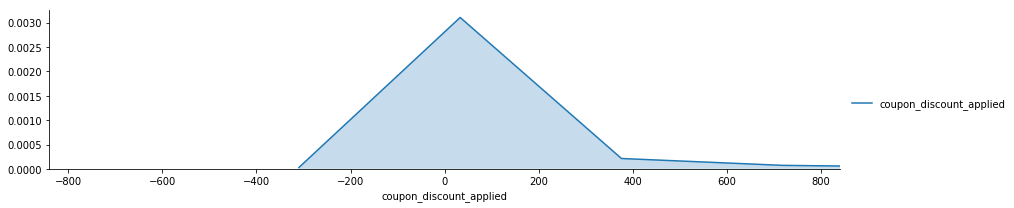

In [30]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'coupon_discount_applied',shade= True)
#g.set(xlim=(df['coupon_discount_applied'].min(), df['coupon_discount_applied'].max()))
g.set(xlim=(-df['coupon_discount_applied'].std(), df['coupon_discount_applied'].std()))
g.add_legend()

In [31]:
df.redpen_discount_used.describe()

count     46030.000000
mean        435.567699
std        1851.597072
min           0.000000
25%           0.000000
50%          54.480000
75%         253.677500
max      102653.770000
Name: redpen_discount_used, dtype: float64

In [32]:
df.redpen_discount_used.head(10)

0    4554.39
1     629.03
2    6269.71
3       0.00
4       0.00
5       0.00
6      94.59
7      85.45
8     251.58
9       0.00
Name: redpen_discount_used, dtype: float64

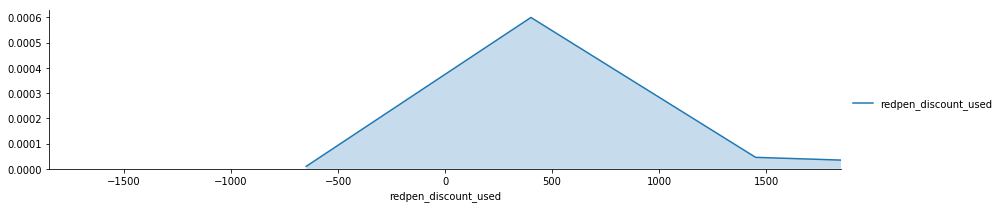

In [33]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'redpen_discount_used',shade= True)
#g.set(xlim=(df['redpen_discount_used'].min(), df['redpen_discount_used'].max()))
g.set(xlim=(-df['redpen_discount_used'].std(), df['redpen_discount_used'].std()))
g.add_legend()

**Note:**<br>
There are 43 columns in the data whereas the data definition according to the *README.md* file has 41 columns.<br>
The two new columns are *coupon_discount_applied* and *redpen_discount_used*.

**Assumptions:**<br>
Assuming "redpen/red pen discount" is the discount applied to provide the red coloured sale price of items in The Iconic's online shop.

Assuming *coupon_discount_applied* should be the number of times a discount coupon was applied in the transaction.<br>
Hence the data type should be integer instead of float.

Assuming *redpen_discount_used* should be the number of times a red pen discount was used.<br>
Hence the data type should be integer instead of float.

**Questions:**<br>
Is "redpen/red pen discount" an industry or The Iconic specific terminology?

### Clean - coupon_discount_applied

In [34]:
# Number of records with NaN values
df.coupon_discount_applied.isna().sum()

10204

In [35]:
# NaN doesn't make sense so convert them to zero and then to integer
df['coupon_discount_applied'] = df.coupon_discount_applied.round(0).fillna(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


### Clean - redpen_discount_used

In [36]:
# Number of records with NaN values
df.redpen_discount_used.isna().sum()

0

In [37]:
# Round the float values and then convert to integer
df['redpen_discount_used'] = df.redpen_discount_used.round(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6270,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,95,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,252,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0


In [38]:
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70e0fd9d5cc84af817d26d46917ce64d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,136.335086,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.571844,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,745.752439,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.599754,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.000000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,33.000000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,254.000000,1.000000,791.

In [39]:
df.isna().sum()

afterpay_payments           0
android_orders              0
apple_payments              0
average_discount_onoffer    0
average_discount_used       0
cancels                     0
cc_payments                 0
coupon_discount_applied     0
curvy_items                 0
customer_id                 0
days_since_first_order      0
days_since_last_order       0
desktop_orders              0
devices                     0
different_addresses         0
female_items                0
home_orders                 0
ios_orders                  0
is_newsletter_subscriber    0
items                       0
macc_items                  0
male_items                  0
mapp_items                  0
mftw_items                  0
msite_orders                0
mspt_items                  0
orders                      0
other_collection_orders     0
other_device_orders         0
parcelpoint_orders          0
paypal_payments             0
redpen_discount_used        0
returns                     0
revenue   

## Stage 3: BUILD
### Labelling data for classification

In [40]:
# Let's look at some columns which have is specific to male or female items
# Note: The Iconic online shop show curvy items being only for women and not for men.
df_X = df[['afterpay_payments',
           'android_orders',
           'apple_payments',
           'average_discount_onoffer',
           'average_discount_used',
           'cancels',
           'cc_payments',
           'coupon_discount_applied',
           'days_since_first_order',
           'days_since_last_order',
           'desktop_orders',
           'devices',
           'different_addresses',
           'home_orders',
           'ios_orders',
           'is_newsletter_subscriber',
           'items',
           'msite_orders',
           'orders',
           'other_collection_orders',
           'other_device_orders',
           'parcelpoint_orders',
           'paypal_payments',
           'redpen_discount_used',
           'returns',
           'revenue',
           'shipping_addresses',
           'vouchers',
           'work_orders',
           'male_items',
           'female_items',
           'mapp_items',
           'wapp_items',
           'mftw_items',
           'wftw_items',
           'macc_items',
           'wacc_items',
           'mspt_items',
           'wspt_items',
           'curvy_items']].copy()
df_X.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items
0,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,N,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0
1,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,Y,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0
2,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,Y,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0
3,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,Y,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,Y,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,N,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,N,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,N,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,N,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0
9,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,Y,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0


### Assumption:
1. A customer is likely to purchase a product for themselves.<br>
That is, a male customer is likely purchase more male product than female products and vice versa.<br>
This assumption will be used to label the data 0 being female customers and 1 being male customer.


2. The women's fashion market is larger than men's so this will be reflected in the number of female customers versus male customers.<br>
Must keep this distribution in mind later when evalulating the model.

In [41]:
# Manually reduce the dimensions by summing the male product related columns and female product related columns.
df_assumption = pd.DataFrame()
df_assumption['female_sum'] = df_X['female_items'] + df_X['wapp_items'] + df_X['wftw_items'] + df_X['wacc_items'] + df_X['wspt_items'] + df_X['curvy_items']
df_assumption['male_sum'] = df_X['male_items'] + df_X['mapp_items'] + df_X['mftw_items'] + df_X['macc_items'] + df_X['mspt_items']
df_assumption.head(10)

,female_sum,male_sum
0,93,5
1,49,4
2,296,22
3,1,1
4,2,0
5,2,1
6,2,0
7,2,1
8,23,3
9,2,0


In [42]:
df_assumption['gender_inferred'] = np.where(df_assumption.female_sum >= df_assumption.male_sum , 0, 1)
df_assumption.tail(20)

,female_sum,male_sum,gender_inferred
46259,0,2,1
46260,0,4,1
46261,2,0,0
46262,8,0,0
46263,2,0,0
46264,2,0,0
46265,0,4,1
46266,2,0,0
46267,6,1,0
46268,26,0,0


In [43]:
# Ratio of Females to Males
print("Females : Males\n%d : %d" %(sum(df_assumption.gender_inferred == 0), df_assumption.gender_inferred.sum()))

Females : Males
34111 : 11919


The ratio shows the assumption made above is likely to be a realistic.

In [44]:
# Concatenate the two dataframes into one and then change is_newsletter_subscriber into numeric
df_assumption = pd.concat([df_X, df_assumption], axis=1)
df_assumption['is_newsletter_subscriber'] = df_assumption.is_newsletter_subscriber.map(dict(Y=1, N=0))
df_assumption.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,0,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,1,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,1,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,1,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,0,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,0,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,0,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0


### Feature Engineering - mean-based features

In [45]:
# Conversions would be important for online retail businesses so let's look into them.
# Average cancels on orders
df_assumption.insert(loc=0, column='avg_cancels_on_orders', value=df_X.cancels/df_X.orders)
# Average returns on orders
df_assumption.insert(loc=1, column='avg_returns_on_orders', value=df_X.returns/df_X.orders)

In [46]:
df_assumption.head(10)

,avg_cancels_on_orders,avg_returns_on_orders,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,0.000000,0.058824,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,0,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0.000000,0.384615,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,1,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,0.028169,0.028169,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,1,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0.000000,0.000000,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,1,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0.000000,0.000000,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0.000000,0.000000,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0.000000,0.000000,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,0,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0.000000,0.000000,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,0,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0.000000,0.125000,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,0,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,1.000000,0.000000,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0


Text(0.5, 0.98, 'Correlation Heatmap')

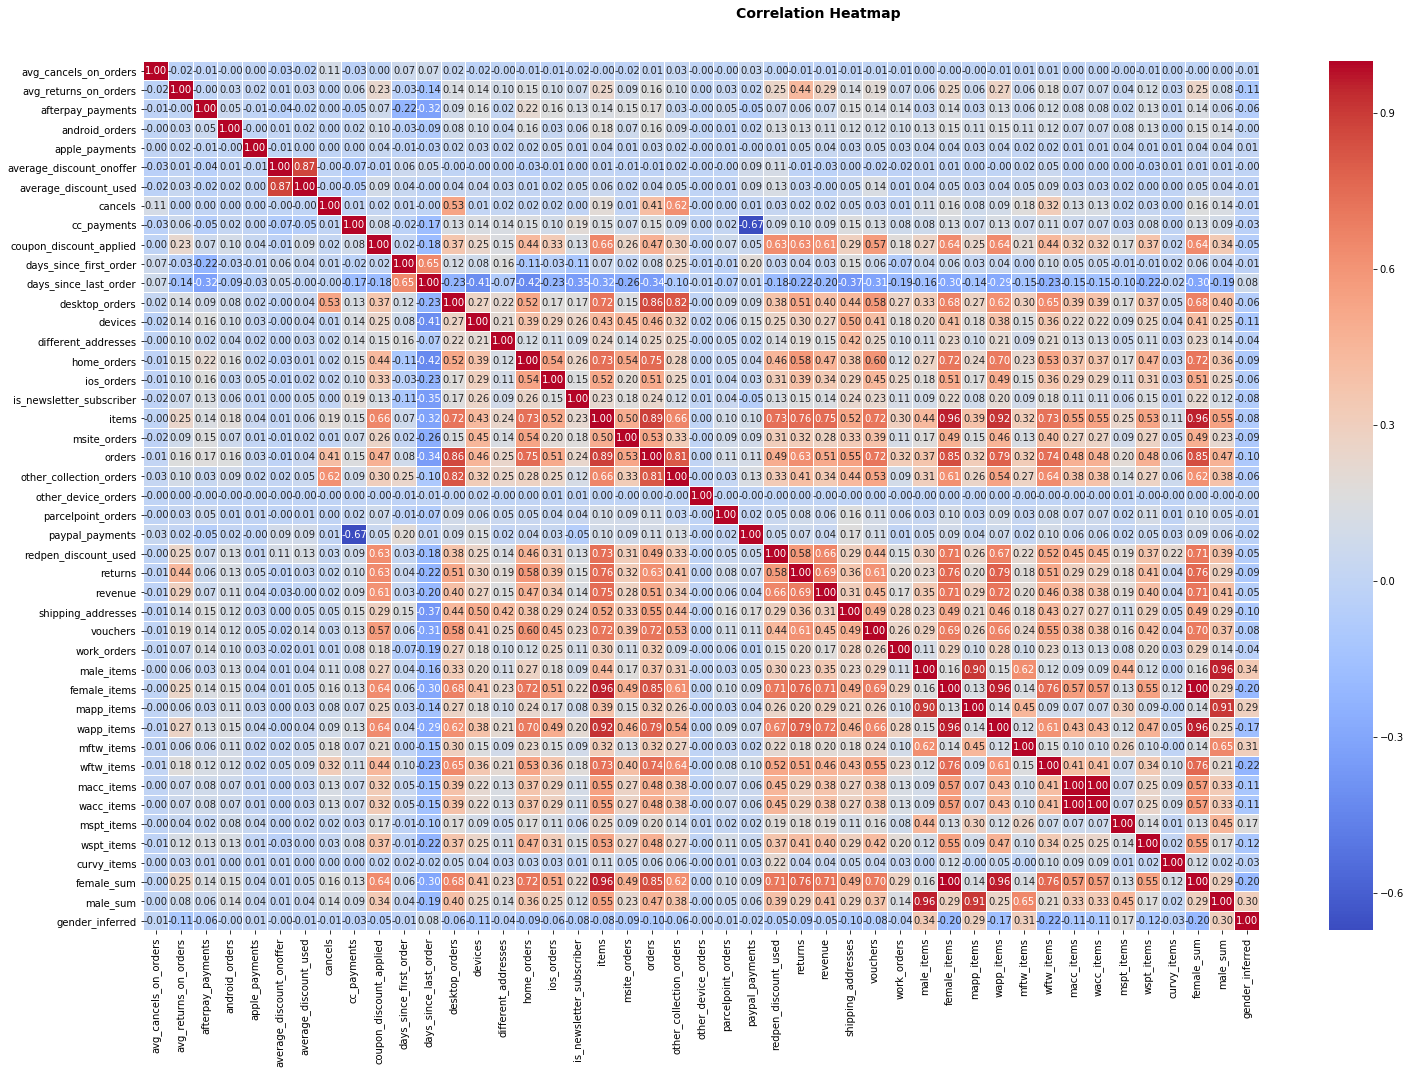

In [47]:
# Looking at a correlation matrix of the dataframe with inferred gender
corr = df_assumption.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(25,15))
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

**Note:** The correlation matrix calculates linear correlation between features and it cannot represent non-linear correlation between features.


For simplicity, we will just pick the columns which have some linear correlation to the inferred gender column.<br>
Using a cutoff of correlation value of -0.10 and 0.10 as a start.

In [48]:
# The gender_inferred column is the target so extract it
corr_gender = pd.DataFrame(corr['gender_inferred'].drop('gender_inferred'))
corr_gender.abs().sort_values(by='gender_inferred',ascending=True)

,gender_inferred
android_orders,0.000232
other_device_orders,0.002755
average_discount_onoffer,0.004021
avg_cancels_on_orders,0.005747
cancels,0.006106
apple_payments,0.008908
average_discount_used,0.011375
parcelpoint_orders,0.011505
days_since_first_order,0.014517
paypal_payments,0.024285


In [49]:
# Dropping columns outside of cutoff
# The column curvy_items was outside of the cutoff but leaving it in the dataframe
# Also, the devices column which means "Number of unique devices used" probably won't help so dropping it
df_assumption.drop(['android_orders',
                    'other_device_orders',
                    'average_discount_onoffer',
                    'cancels',
                    'apple_payments',
                    'average_discount_used',
                    'avg_cancels_on_orders',
                    'parcelpoint_orders',
                    'days_since_first_order',
                    'paypal_payments',
                    'cc_payments',
                    'devices',
                    'work_orders',
                    'different_addresses',
                    'revenue',
                    'coupon_discount_applied',
                    'redpen_discount_used',
                    'ios_orders',
                    'afterpay_payments',
                    'desktop_orders',
                    'other_collection_orders',
                    'is_newsletter_subscriber',
                    'days_since_last_order',
                    'items',
                    'vouchers',
                    'home_orders',
                    'returns',
                    'msite_orders',
                    'shipping_addresses',
                    'orders'], axis=1, inplace=True)

Text(0.5, 0.98, 'Correlation Heatmap')

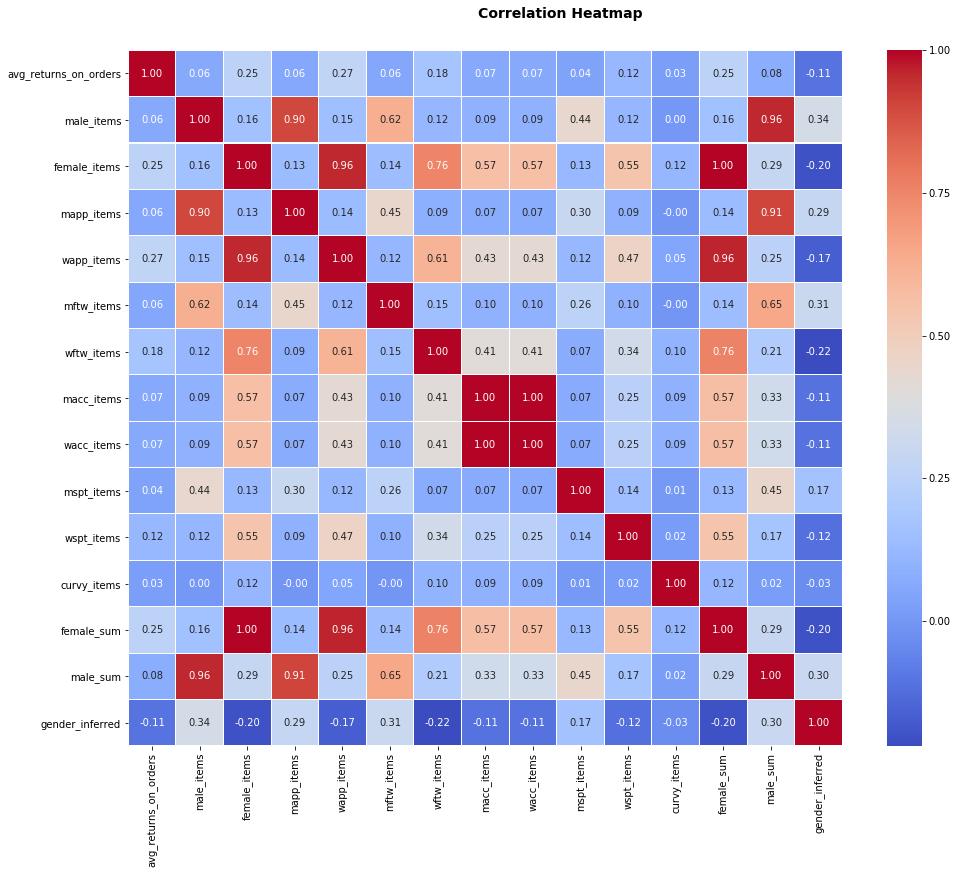

In [50]:
# Looking at a correlation matrix of the dataframe with inferred gender
corr = df_assumption.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(16,12))
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

In [51]:
df_assumption.head(10)

,avg_returns_on_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,0.058824,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0.384615,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,0.028169,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0.000000,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0.000000,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0.000000,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0.000000,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0.000000,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0.125000,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,0.000000,0,1,0,0,0,1,0,0,0,0,0,2,0,0


### Train and Test Set

In [52]:
# Specify the data 
X = df_assumption.iloc[:,0:14]

# Specify the target labels and flatten the array
y = df_assumption['gender_inferred']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Standardize the data

In [53]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/home/philk/.virtualenvs/dschallenge/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Model the data

In [54]:
# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(14, activation='relu', input_shape=(14,)))

# Add one hidden layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
# Model output shape
model.output_shape

(None, 1)

In [56]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Model config
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 14),
    'dtype': 'float32',
    'units': 14,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'c

In [58]:
# List all weight tensors 
model.get_weights()

[array([[ 2.12137163e-01,  3.77982140e-01, -4.50065732e-01,
          1.78366363e-01, -9.30202901e-02,  3.99600625e-01,
         -4.24822956e-01, -4.43772972e-01, -1.65293694e-01,
         -3.20811272e-01, -4.62730050e-01,  2.83095777e-01,
          4.25818443e-01, -3.93523067e-01],
        [-7.31582046e-02,  3.51706743e-02,  1.34501934e-01,
         -3.39468479e-01, -4.40359235e-01, -3.07643026e-01,
          1.69041634e-01,  1.16032481e-01, -2.46414542e-03,
          2.07483470e-01,  3.84995937e-01, -4.24691856e-01,
         -3.66399527e-01,  4.08109307e-01],
        [-1.25657409e-01,  4.35032845e-01,  4.07192171e-01,
         -1.10806733e-01, -3.55844319e-01,  3.33961546e-01,
          4.15424168e-01, -1.28199697e-01, -9.52519178e-02,
         -1.28242075e-01, -1.91697299e-01, -8.09605718e-02,
         -5.87203205e-02,  3.00440967e-01],
        [-7.67167509e-02, -2.54019439e-01, -9.59789753e-03,
         -2.02405274e-01, -1.50022984e-01, -2.95381546e-01,
          4.58982348e-01, -5

### Compile and Fit

In [59]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=90, batch_size=64, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
34522/34522 [==============================] - 1s 25us/step - loss: 0.3787 - acc: 0.8791
Epoch 2/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0512 - acc: 0.9873
Epoch 3/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0240 - acc: 0.9932
Epoch 4/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0144 - acc: 0.9964
Epoch 5/90
34522/34522 [==============================] - 1s 18us/step - loss: 0.0093 - acc: 0.9979
Epoch 6/90
34522/34522 [==============================] - 1s 18us/step - loss: 0.0065 - acc: 0.9987
Epoch 7/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0047 - acc: 0.9992
Epoch 8/90
34522/34522 [==============================] - 1s 16us/step - loss: 0.0033 - acc: 0.9995
Epoch 9/90
34522/34522 [==============================] - 1s 15us/step - loss: 0.0026 - acc: 0.9995
Epoch 10/90
34522/34522 [===========================

34522/34522 [==============================] - 1s 16us/step - loss: 3.9574e-04 - acc: 0.9998
Epoch 78/90
34522/34522 [==============================] - 1s 15us/step - loss: 8.1502e-06 - acc: 1.0000
Epoch 79/90
34522/34522 [==============================] - 1s 16us/step - loss: 5.9241e-06 - acc: 1.0000
Epoch 80/90
34522/34522 [==============================] - 1s 16us/step - loss: 5.4652e-06 - acc: 1.0000
Epoch 81/90
34522/34522 [==============================] - 1s 16us/step - loss: 5.0316e-06 - acc: 1.0000
Epoch 82/90
34522/34522 [==============================] - 1s 16us/step - loss: 4.7287e-06 - acc: 1.0000
Epoch 83/90
34522/34522 [==============================] - 1s 16us/step - loss: 4.1360e-06 - acc: 1.0000
Epoch 84/90
34522/34522 [==============================] - 1s 17us/step - loss: 3.8470e-06 - acc: 1.0000
Epoch 85/90
34522/34522 [==============================] - 1s 16us/step - loss: 3.5660e-06 - acc: 1.0000
Epoch 86/90
34522/34522 [==============================] - 1s 16us/

### Predict Values

In [60]:
y_pred = model.predict(X_test, batch_size=1)
y_pred[:5]

array([[9.4953680e-24],
       [9.9999917e-01],
       [1.0000000e+00],
       [3.3109466e-17],
       [1.0000000e+00]], dtype=float32)

In [61]:
y_test[:5]

32560    0
38299    1
41151    1
18314    0
15765    1
Name: gender_inferred, dtype: int64

### Evaluate Mode

In [62]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

11508/11508 [==============================] - 0s 15us/step
[0.0019028236357978765, 0.9998262078554049]


In [63]:
# Confusion matrix
y_pred = y_pred.round().astype(int)
confusion_matrix(y_test, y_pred)

array([[8568,    1],
       [   1, 2938]])

In [64]:
# Precision 
precision_score(y_test, y_pred)

0.9996597482136781

In [65]:
# Recall
recall_score(y_test, y_pred)

0.9996597482136781

In [66]:
# F1 score
f1_score(y_test,y_pred)

0.9996597482136781

In [67]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.9995430484820875